# About Dataset

### Context
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

### Content
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

### Detailed Column Descriptions
bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# Loaded Import Libaries

In [1]:
import pandas as pd #analysis data
import numpy as np #analysis numerical data

#visulization libary
import seaborn as sns
import matplotlib.pyplot as plt

#remove unneccesary libary
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder #convert categorical type data into binary from
from scipy.stats import zscore #outliers libary  
from sklearn.preprocessing import power_transform  #skewness libary
from statsmodels.stats.outliers_influence import variance_inflation_factor # multicolonility
from scipy import stats
from imblearn.over_sampling import SMOTE #balancing libary
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [3]:
# diffrent classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [4]:
# loaded diffrent type model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
# loaded diffrent algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

# Load Dataset

In [6]:
# load train dataset
df = pd.read_csv('train.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Knowing about Dataset

### Shape Of Dataset

In [7]:
print(f'Shape of dataset is {df.shape}')

Shape of dataset is (45211, 17)


### Get Information About Dataset

In [8]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Information About Dataset

1. There are 16 independent columns and 1 dependent target column in this dataset.

2. There are 7 columns with integer data type and 10 columns with object data type.

3. No null values are present in this dataset.

### White Space

In [9]:
df.loc[df.y == ' ']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


There are no white spaces present in this dataset.

### Null Value

In [10]:
#null values in this dataset
df.isnull().sum().sum()

0

There are no null values are prsent in this dataset.

### Describe Dataset

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1. There is a high difference between the mean and median, indicating the presence of skewness in the dataset.

2. There is a high diffrence between 75% and max, indicating the precence of skewness in the dataset.

3. negative value are present in pdays columns variable.

# Duplicated Values

In [12]:
df.duplicated().sum()

0

No, duplictes values are not present in dataset

# Data Exploration

In [13]:
# I divided the dataset into columns for numerical and categorical variables.
numerical = []
categorical = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        numerical.append(i)
    else:
        categorical.append(i)
        
print('Numerical Data Type Variable',numerical)
print('\n')
print('Categorical Data Type Variable',categorical)

Numerical Data Type Variable ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Categorical Data Type Variable ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


### values count for categorical type data job variable

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


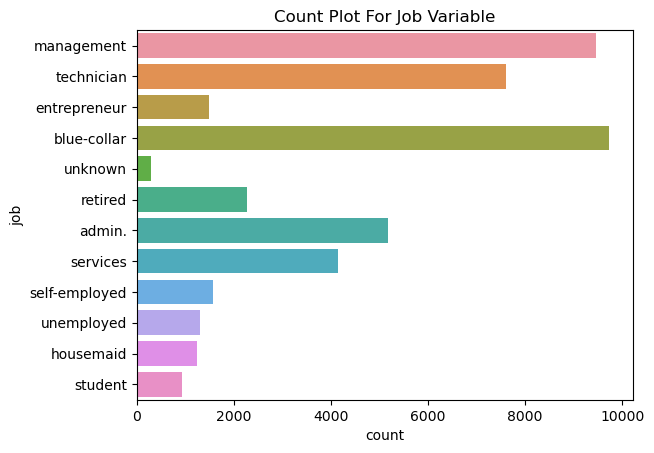

In [14]:
# values count for job variable
print(df.job.value_counts())
sns.countplot(y=df.job)
plt.title('Count Plot For Job Variable')
plt.show()

1. There are in job variable large number occupied by Management, Technician and Blue-collar.

2. There are a unknown variable is present in this job variable.

In [15]:
#percentage of each job type in this variable
print(df.job.value_counts() / len(df)*100)

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64


In the job variable the unknown variable type is present near 0.63% so it means cleaning is required in this variable.

### values count for categorical type data marital variable

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


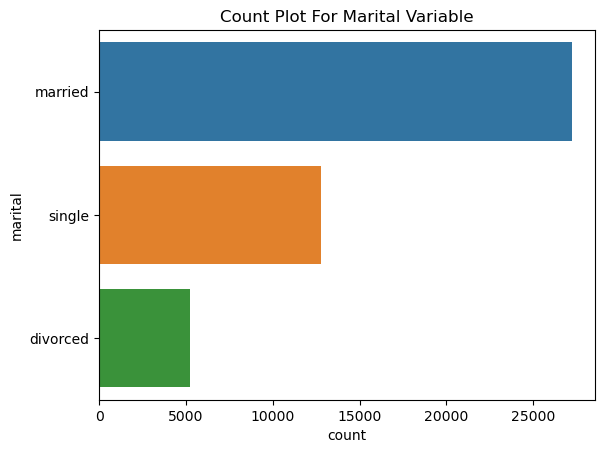

In [16]:
# values count for job variable
print(df.marital.value_counts())
sns.countplot(y=df.marital)
plt.title('Count Plot For Marital Variable')
plt.show()

1. The majority of customers are married, followed by single individuals. 

2. The data appears to be clean and requires no further cleaning.

### values count for categorical type data education variable

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


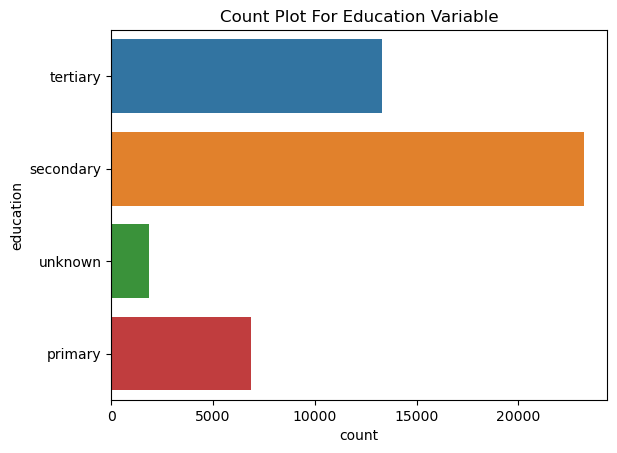

In [17]:
# values count for job variable
print(df.education.value_counts())
sns.countplot(y=df.education)
plt.title('Count Plot For Education Variable')
plt.show()

1. The majority of customers have a secondary education background, with tertiary education following closely behind. 

2. There is an unidentified variable present.

In [18]:
#percentage of each education type in this variable
print(df.education.value_counts() / len(df)*100)

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64


In the education variable the unknown variable type is present near 4.10% so it means cleaning is required in this variable.

### values count for categorical type data default variable

no     44396
yes      815
Name: default, dtype: int64


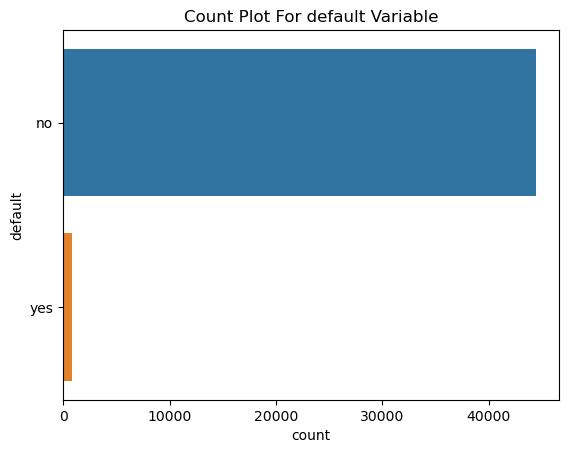

In [19]:
# values count for default variable
print(df.default.value_counts())
sns.countplot(y=df.default)
plt.title('Count Plot For default Variable')
plt.show()

1. The majority of our customers do not possess a credit card.

2. The data appears acceptable; no cleaning is necessary.

### values count for categorical type data housing variable

yes    25130
no     20081
Name: housing, dtype: int64


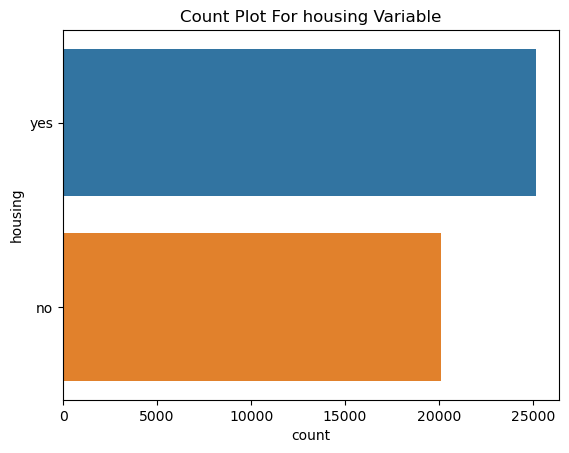

In [20]:
# values count for housing variable
print(df.housing.value_counts())
sns.countplot(y=df.housing)
plt.title('Count Plot For housing Variable')
plt.show()

1. Most customer have loan on housing.

2. Data seem ok, cleaning not required.

### values count for categorical type data loan variable

no     37967
yes     7244
Name: loan, dtype: int64


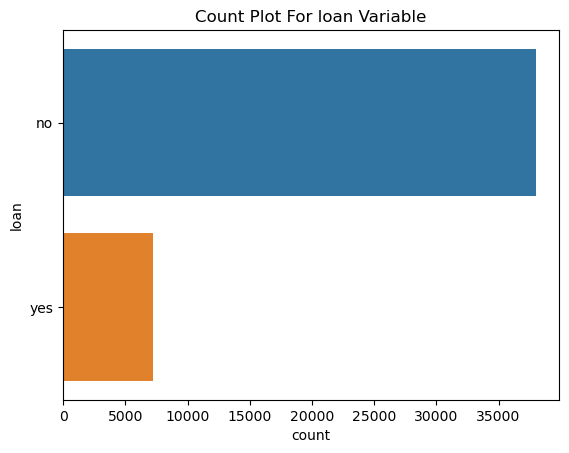

In [21]:
# values count for loan variable
print(df.loan.value_counts())
sns.countplot(y=df.loan)
plt.title('Count Plot For loan Variable')
plt.show()

1. Most customer not having personel loan.

2. Data seem ok, cleaning not required.

### values count for categorical type data contact variable

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


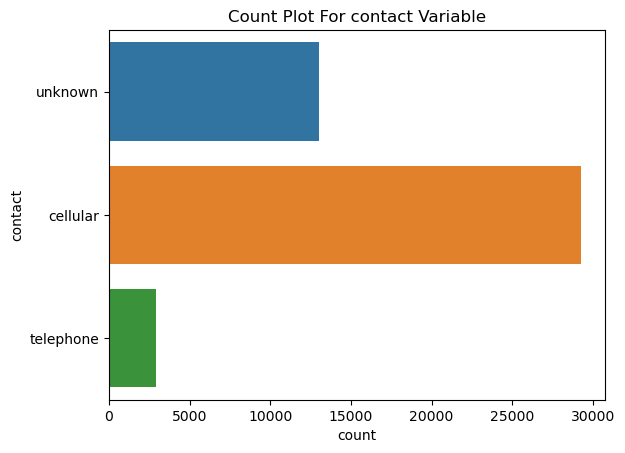

In [22]:
# values count for contact variable
print(df.contact.value_counts())
sns.countplot(y=df.contact)
plt.title('Count Plot For contact Variable')
plt.show()

The majority of customers have a celluar contact, with unkoiwn contact following closely behind.

There is an unidentified variable present.

In [23]:
#percentage of each contact type in this variable
print(df.contact.value_counts() / len(df)*100)

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64


In the contact variable the unknown variable type is present near 28.80% so it means cleaning is required in this variable.

### values count for categorical type data month variable

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


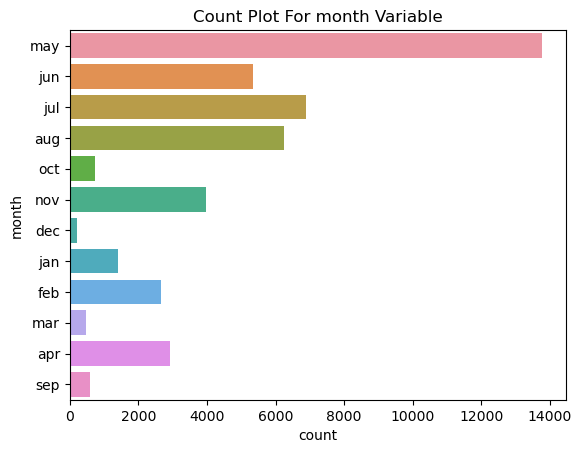

In [24]:
# values count for month variable
print(df.month.value_counts())
sns.countplot(y=df.month)
plt.title('Count Plot For month Variable')
plt.show()

1. Most number of calls are doing in may month then followed by jul.

2. Data seem ok, cleaning not requried.

### values count for categorical type data poutcome variable

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


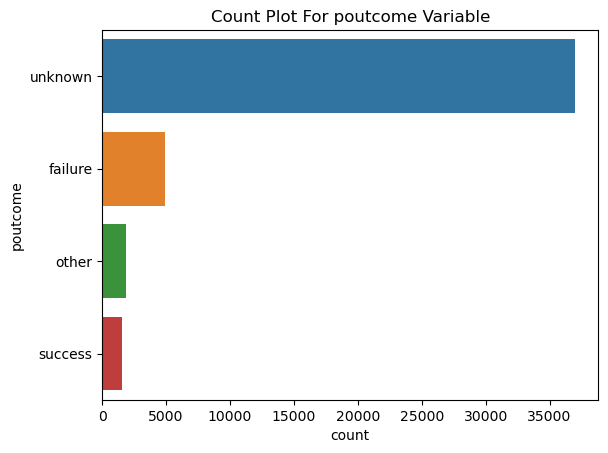

In [25]:
# values count for month variable
print(df.poutcome.value_counts())
sns.countplot(y=df.poutcome)
plt.title('Count Plot For poutcome Variable')
plt.show()

1. outcome of previous markiting campaign most are unknown

2. There is an unidentified variable present.

In [26]:
#percentage of each poutcome type in this variable
print(df.poutcome.value_counts() / len(df)*100)

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64


Unknown variable present in this variable is near 81.74%, cleaning is requried

### value count for numerical type data age variable

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


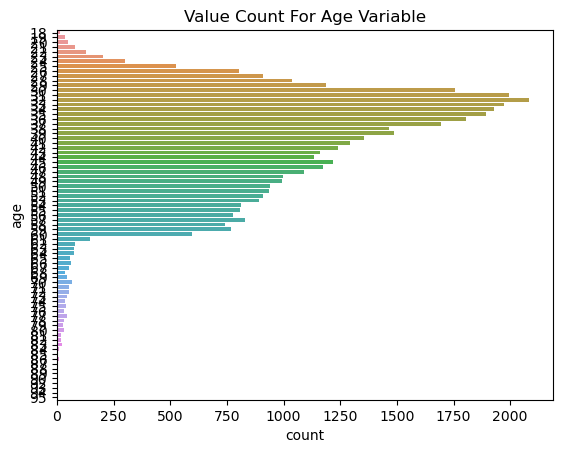

In [27]:
#count plot for age variable
print(df.age.value_counts())
sns.countplot(y=df.age)
plt.title('Value Count For Age Variable')
plt.show()

In [28]:
print('Mean Of Age Variable',df.age.mean())
print('Min Value In Age Variable',df.age.min())
print('Max Value In Age Variable',df.age.max())
print('Std Deviation In Age Variable',df.age.std())

Mean Of Age Variable 40.93621021432837
Min Value In Age Variable 18
Max Value In Age Variable 95
Std Deviation In Age Variable 10.618762040975431


1. The minimum age requirement for a loan at the bank is 18.

2. The maximum age for a customer to receive a loan is 95.

3. Outliers are present in this dataset because the data is spread over three standard deviations.

4. The majority of people who take out loans are around the age of 41.

0.00    18.0
0.10    29.0
0.20    32.0
0.30    34.0
0.40    36.0
0.50    39.0
0.60    42.0
0.70    46.0
0.80    51.0
0.90    56.0
0.95    59.0
0.98    63.0
0.99    71.0
1.00    95.0
Name: age, dtype: float64


<AxesSubplot: >

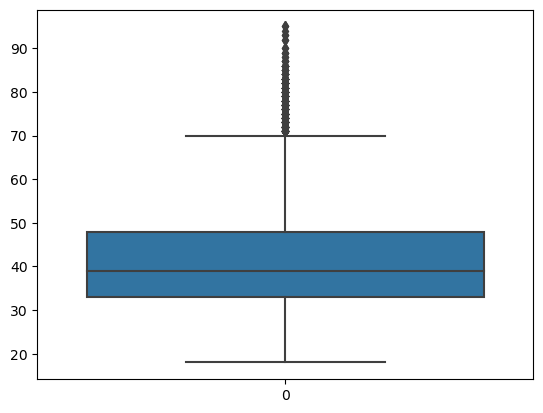

In [29]:
# ckeck outliers by quantile method
age_quan=df['age'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(age_quan)
#check outliers by visualization
sns.boxplot(df.age)

outlers are present in it. it solve but later.

### value count for numerical type data balance variable

In [30]:
#count plot for balance variable
print(df.balance.value_counts())
# sns.countplot(y=df.balance)
# plt.title('Value Count For Balance Variable')
# plt.show()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64


In [31]:
print('Mean Of Balance Variable',df.balance.mean())
print('Min Value In Balance Variable',df.balance.min())
print('Max Value In Balance Variable',df.balance.max())
print('Std Deviation In Balance Variable',df.balance.std())

Mean Of Balance Variable 1362.2720576850766
Min Value In Balance Variable -8019
Max Value In Balance Variable 102127
Std Deviation In Balance Variable 3044.7658291686002


1. The minimum yearly balance requirement for obtaining a loan from the bank is near 8019 euroe.

2. The maximum yearly balance  for customers who can apply for a loan is not specified properly.

3. Outliers are present in this dataset as the data is spread over three standard deviations.

4. The majority of individuals who apply for loans are around 1362 yearly balance.

0.00     -8019.0
0.10         0.0
0.20        22.0
0.30       131.0
0.40       272.0
0.50       448.0
0.60       701.0
0.70      1126.0
0.80      1859.0
0.90      3574.0
0.95      5768.0
0.98      9439.4
0.99     13164.9
1.00    102127.0
Name: balance, dtype: float64


<AxesSubplot: >

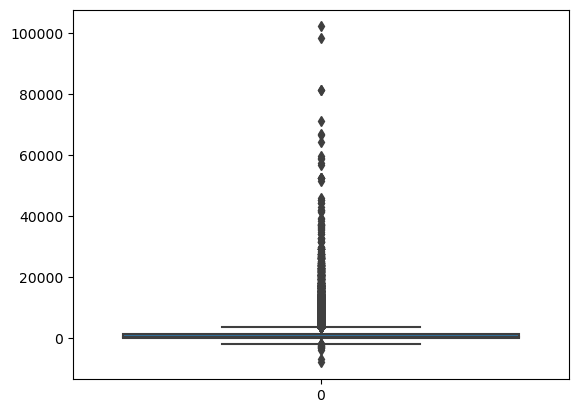

In [32]:
# ckeck outliers by quantile method
bal_quan=df['balance'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(bal_quan)
#check outliers by visualization
sns.boxplot(df.balance)

Outliers are present in it in high level

### value count for numerical type data day variable

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


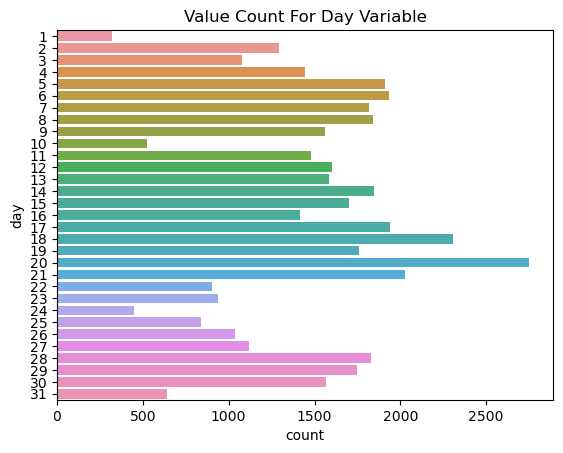

In [33]:
#count plot for day variable
print(df.day.value_counts())
sns.countplot(y=df.day)
plt.title('Value Count For Day Variable')
plt.show()

In [34]:
print('Mean Of Day Variable',df.day.mean())
print('Min Value In Day Variable',df.day.min())
print('Max Value In Day Variable',df.day.max())
print('Std Deviation In Day Variable',df.day.std())

Mean Of Day Variable 15.80641879188693
Min Value In Day Variable 1
Max Value In Day Variable 31
Std Deviation In Day Variable 8.322476153044185


1. The bank's agent contacted the customer last month for 1 day.

2. The bank's agent contacted the customer last in month, and the maximum contact day is 31.

3. The agent usually calls the customer about 15 times a month.

4. The high standard deviation suggests that the data is widely spread, indicating the presence of outliers in this variable.

0.00     1.0
0.10     5.0
0.20     7.0
0.30    10.0
0.40    13.0
0.50    16.0
0.60    18.0
0.70    20.0
0.80    24.0
0.90    28.0
0.95    29.0
0.98    30.0
0.99    31.0
1.00    31.0
Name: day, dtype: float64


<AxesSubplot: >

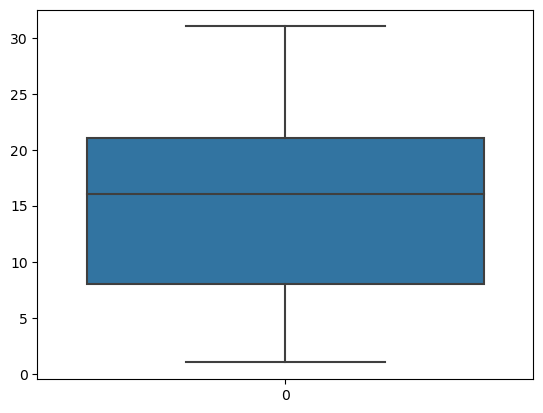

In [35]:
# ckeck outliers by quantile method
day_quan=df['day'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(day_quan)
#check outliers by visualization
sns.boxplot(df.day)

No outliers are present in it.

### value count for numerical type data duration variable

In [36]:
#count plot for duration variable
print(df.duration.value_counts())
# sns.countplot(y=df.duration)
# plt.title('Value Count For Duration Variable')
# plt.show()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64


In [37]:
print('Mean Of Duration Variable',df.duration.mean())
print('Min Value In Duration Variable',df.duration.min())
print('Max Value In Duration Variable',df.duration.max())
print('Std Deviation In Duration Variable',df.duration.std())

Mean Of Duration Variable 258.1630797814691
Min Value In Duration Variable 0
Max Value In Duration Variable 4918
Std Deviation In Duration Variable 257.52781226517095


1. Call between agent and customer is min 0 bcoz they don't call each other.

2. Max call in second is 4918.

3. Mean Call in seconds  is 258.

4. Outliers are present in this variable.

0.00       0.0
0.10      58.0
0.20      89.0
0.30     117.0
0.40     147.0
0.50     180.0
0.60     223.0
0.70     280.0
0.80     368.0
0.90     548.0
0.95     751.0
0.98    1051.0
0.99    1269.0
1.00    4918.0
Name: duration, dtype: float64


<AxesSubplot: >

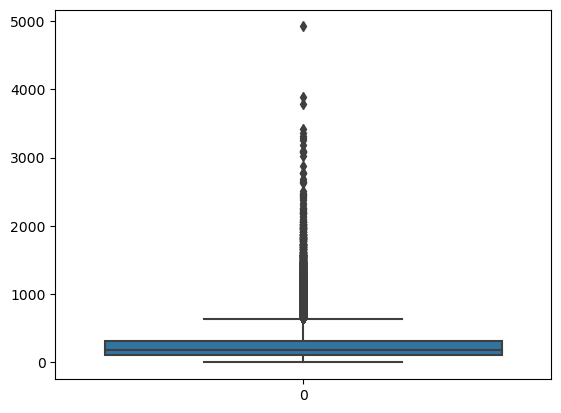

In [38]:
# ckeck outliers by quantile method
dur_quan=df['duration'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(dur_quan)
#check outliers by visualization
sns.boxplot(df.duration)

outliers are present in it.

### value count for numerical type data campaign variable

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64


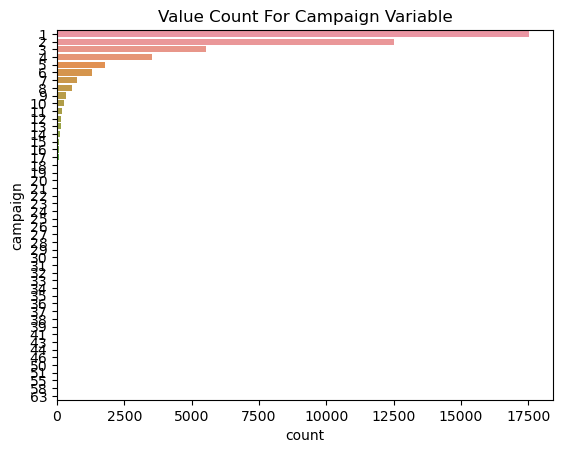

In [39]:
#count plot for campaign variable
print(df.campaign.value_counts())
sns.countplot(y=df.campaign)
plt.title('Value Count For Campaign Variable')
plt.show()

In [40]:
print('Mean Of Campaign Variable',df.campaign.mean())
print('Min Value In Campaign Variable',df.campaign.min())
print('Max Value In Campaign Variable',df.campaign.max())
print('Std Deviation In Campaign Variable',df.campaign.std())

Mean Of Campaign Variable 2.763840658246887
Min Value In Campaign Variable 1
Max Value In Campaign Variable 63
Std Deviation In Campaign Variable 3.0980208832802205


1. At least one contact was made during this campaign.

2. The highest number of contacts made during this campaign was 63.

3. On average, 2.76 contacts were made during this campaign.

4. Although there are some outliers, they are not significant in number.

0.00     1.0
0.10     1.0
0.20     1.0
0.30     1.0
0.40     2.0
0.50     2.0
0.60     2.0
0.70     3.0
0.80     4.0
0.90     5.0
0.95     8.0
0.98    12.0
0.99    16.0
1.00    63.0
Name: campaign, dtype: float64


<AxesSubplot: >

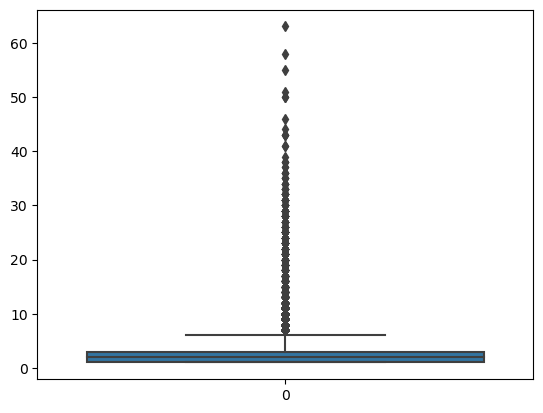

In [41]:
# ckeck outliers by quantile method
camp_quan=df['campaign'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(camp_quan)
#check outliers by visualization
sns.boxplot(df.campaign)

Outliers are presnt in it.

### value count for numerical type data pday variable

In [42]:
#count plot for pdays variable
print(df.pdays.value_counts())
# sns.countplot(y=df.pdays)
# plt.title('Value Count For Pdays Variable')
# plt.show()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64


In [43]:
print('Mean Of pdays Variable',df.pdays.mean())
print('Min Value In Pdays Variable',df.pdays.min())
print('Max Value In Pdays Variable',df.pdays.max())
print('Std Deviation In Pdays Variable',df.pdays.std())

Mean Of pdays Variable 40.19782796222158
Min Value In Pdays Variable -1
Max Value In Pdays Variable 871
Std Deviation In Pdays Variable 100.1287459906047


1. Last contact from previous campaign is near -1.

2. Max days from last campaign is near 871 days.

3. Mean of last call from campaign is 40 days.

4. Outliers are present in this data variable.

0.00     -1.0
0.10     -1.0
0.20     -1.0
0.30     -1.0
0.40     -1.0
0.50     -1.0
0.60     -1.0
0.70     -1.0
0.80     -1.0
0.90    185.0
0.95    317.0
0.98    360.0
0.99    370.0
1.00    871.0
Name: pdays, dtype: float64


<AxesSubplot: >

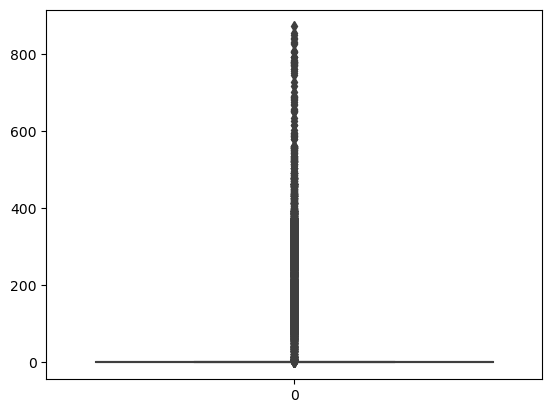

In [44]:
# ckeck outliers by quantile method
pday_quan=df['pdays'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(pday_quan)
#check outliers by visualization
sns.boxplot(df.pdays)

outliers are presnt in it.

### value count for numerical type data previous variable

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64


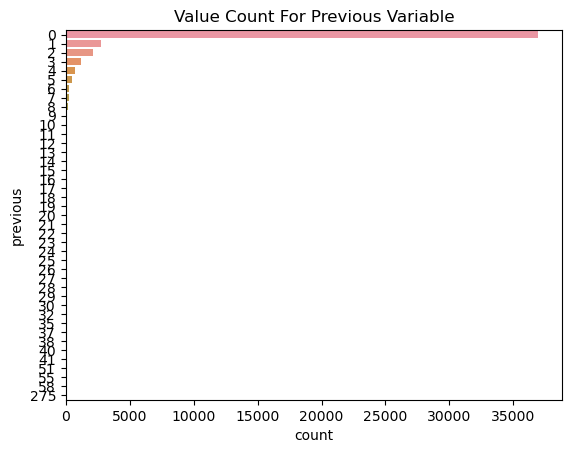

In [45]:
#count plot for previous variable
print(df.previous.value_counts())
sns.countplot(y=df.previous)
plt.title('Value Count For Previous Variable')
plt.show()

In [46]:
print('Mean Of previous Variable',df.previous.mean())
print('Min Value In Previous Variable',df.previous.min())
print('Max Value In Previous Variable',df.previous.max())
print('Std Deviation In Previous Variable',df.previous.std())

Mean Of previous Variable 0.5803233726305546
Min Value In Previous Variable 0
Max Value In Previous Variable 275
Std Deviation In Previous Variable 2.3034410449314233


1. Min of number of contacts performed before this campaign is 0.

2. Max of number of contacts performed before this campaign is 275.

3. Mean of contacts before this capaign for clients is 0.58

4. Outliers are not present in this dataset

0.00      0.0
0.10      0.0
0.20      0.0
0.30      0.0
0.40      0.0
0.50      0.0
0.60      0.0
0.70      0.0
0.80      0.0
0.90      2.0
0.95      3.0
0.98      6.0
0.99      8.9
1.00    275.0
Name: previous, dtype: float64


<AxesSubplot: >

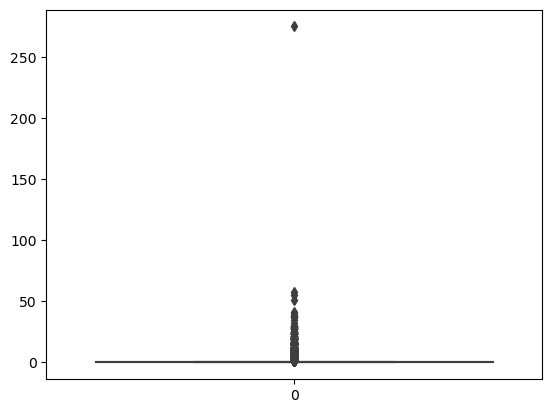

In [47]:
# ckeck outliers by quantile method
pre_quan=df['previous'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1])
print(pre_quan)
#check outliers by visualization
sns.boxplot(df.previous)

outliers are presnt in it.

# Data Cleaning And Data Preparation

### Cleaning in Job variable and prepartion data for analysis

In [48]:
#cleaning for job variable
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [49]:
#Here a unknown variable are present so we check how % availabel
pd.DataFrame({'Job Value Count':df.job.value_counts(),'Job Percentage Count':df.job.value_counts() / len(df)*100})

,Job Value Count,Job Percentage Count
blue-collar,9732,21.525735
management,9458,20.919688
technician,7597,16.803433
admin.,5171,11.437482
services,4154,9.188029
retired,2264,5.007631
self-employed,1579,3.492513
entrepreneur,1487,3.289023
unemployed,1303,2.882042
housemaid,1240,2.742695


There are 288 count and 0.63% unknown variable are present so we replace it by high value of job value 

In [50]:
#check similar value
cross_job=pd.crosstab(df.job,df.y)
cross_job_perce = round(cross_job.apply(lambda x : x/x.sum(),axis = 1),2)
cross_job_perce

y,no,yes
job,,
admin.,0.88,0.12
blue-collar,0.93,0.07
entrepreneur,0.92,0.08
housemaid,0.91,0.09
management,0.86,0.14
retired,0.77,0.23
self-employed,0.88,0.12
services,0.91,0.09
student,0.71,0.29


Here closest matching keyword is self-employed so we replace it by self_employed 

In [51]:
#replace unknown keyword
df['job_new'] = df.job
df.job_new[df.job == 'unknown'] = 'self-employed'
print(df.job_new.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1867
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job_new, dtype: int64


### Cleaning in education variable and prepartion data for analysis

In [52]:
#Here a unknown variable are present so we check how % availabel
pd.DataFrame({'Education Value Count':df.education.value_counts(),'Education Percentage Count':df.education.value_counts() / len(df)*100})

,Education Value Count,Education Percentage Count
secondary,23202,51.319369
tertiary,13301,29.419831
primary,6851,15.153392
unknown,1857,4.107407


There are 1857 count and 4.10% unknown variable are present so we replace it by similar value of eduaction value. keyword

In [53]:
#check similar value
cross_edu=pd.crosstab(df.education,df.y)
cross_edu_perce = round(cross_edu.apply(lambda x : x/x.sum(),axis = 1),2)
cross_edu_perce

y,no,yes
education,,
primary,0.91,0.09
secondary,0.89,0.11
tertiary,0.85,0.15
unknown,0.86,0.14


tertiary shows similar value compare to unknown keyword

In [54]:
#replace unknown keyword
df['edu_new'] = df.education
df.edu_new[df.education == 'unknown'] = 'tertiary'
print(df.edu_new.value_counts())

secondary    23202
tertiary     15158
primary       6851
Name: edu_new, dtype: int64


### Cleaning in contact variable and prepartion data for analysis

In [55]:
#Here a unknown variable are present so we check how % availabel
pd.DataFrame({'Contact Value Count':df.contact.value_counts(),'Contact Percentage Count':df.contact.value_counts() / len(df)*100})

,Contact Value Count,Contact Percentage Count
cellular,29285,64.774059
unknown,13020,28.798301
telephone,2906,6.427639


There are 13020 and 28.79 unknown variable are present so we replace it by similar value of contact value keyword.

In [56]:
cross_con = pd.crosstab(df.contact, df.y)
cross_con_perc = round(cross_con.apply(lambda x: x/x.sum()),2)
cross_con_perc

y,no,yes
contact,,
cellular,0.62,0.83
telephone,0.06,0.07
unknown,0.31,0.10


There are no nearly and similar values comes for unknown so we solv this by creat a flag variable for it.

In [57]:
df['contact_new'] = 'y'
df['contact_new'][df['contact'] == 'unknown'] = 'n'
print(df['contact_new'].value_counts())

y    32191
n    13020
Name: contact_new, dtype: int64


### Cleaning in contact variable and prepartion data for analysis

In [58]:
#Here a unknown variable are present so we check how % availabel
pd.DataFrame({'Poutcome Value Count':df.poutcome.value_counts(),'Poutcome Percentage Count':df.poutcome.value_counts() / len(df)*100})

,Poutcome Value Count,Poutcome Percentage Count
unknown,36959,81.747805
failure,4901,10.840282
other,1840,4.069806
success,1511,3.342107


There are 36959 rows and 81.74% data are unknown type so we replace it by flag method or impute method

In [59]:
#crosstab for potcome variable
cross_pout = pd.crosstab(df.poutcome, df.y)
cross_pout_perc = round(cross_pout.apply(lambda x: x/x.sum()),2)
cross_pout_perc

y,no,yes
poutcome,,
failure,0.11,0.12
other,0.04,0.06
success,0.01,0.18
unknown,0.84,0.64


Due to the high percentage of unknown values, we cannot impute them or create a flag variable. Instead,
we merge the other variables and create a new variable for non-existent values.

In [60]:
df['poutcome_new'] = df['poutcome']
df['poutcome_new'][df['poutcome'] == 'unknown'] = 'non-exist'
df['poutcome_new'][df['poutcome'] == 'other'] = 'non-exist'
print(df['poutcome_new'].value_counts())

non-exist    38799
failure       4901
success       1511
Name: poutcome_new, dtype: int64


### Cleaning in balance variable and prepartion data for analysis

In [61]:
#check balance variable
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Since the standard deviation value is high, it is possible that there are outliers in this variable.

In [62]:
#first of all convert balance in abs form
df['balance'] = abs(df['balance'])

### Cleaning in pday variable and prepartion data for analysis

In [63]:
#check pdays variable
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [64]:
df['pdays_new'] = 'No'
df['pdays_new'][df['pdays'] >= 0] = 'Yes'
print(df['pdays_new'].value_counts())

No     36954
Yes     8257
Name: pdays_new, dtype: int64


### Cleaning in previous variable and prepartion data for analysis¶

In [65]:
#check pdays variable
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [66]:
df['previous_new'] = 'No'
df['previous_new'][df['previous'] >= 1] = 'Yes'
print(df['previous_new'].value_counts())

No     36954
Yes     8257
Name: previous_new, dtype: int64


In [67]:
#columns of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_new', 'edu_new', 'contact_new',
       'poutcome_new', 'pdays_new', 'previous_new'],
      dtype='object')

In [68]:
# remove duplicate columns from which we are new created
df.drop(['job','education','contact','poutcome','pdays','previous'],axis=1,inplace=True)

# Visulization of  Categorical Type Dataset

In [69]:
# Now we create a new column of target for better understanding
df['Target']= np.where(df['y']=='yes',1,0)

In [70]:
# Creating a Visualization for a Dataset with Categorical Data Types.
def categorical_var(df,variable,target='Target', invert_axis=False):
    #'''we create a categorical function for comparasion other variable with target variable how much they understanding each 
    #other'''

    fig,ax = plt.subplots(ncols=2,figsize = (10,5))
    
    #plot count plot for variable
    if invert_axis == False:
        sns.countplot(x=variable,data=df,ax=ax[0])
    else:
        sns.countplot(y=variable, data=df, ax=ax[0])
    ax[0].set_title(f'Count variable of {variable}')
        
    #plot relation diagrm between variable and target columns
    
    if invert_axis==False:
        sns.boxplot(x= variable, y= target, data=df, ax=ax[1])
    else:
        sns.barplot(y= variable, x= target,data=df,ax=ax[1])
    ax[1].set_title(f'Comparision between Target and {variable}')
    plt.tight_layout()
    plt.show()

### Bi Varient Visulaization For Categorical Data Variable Job_new

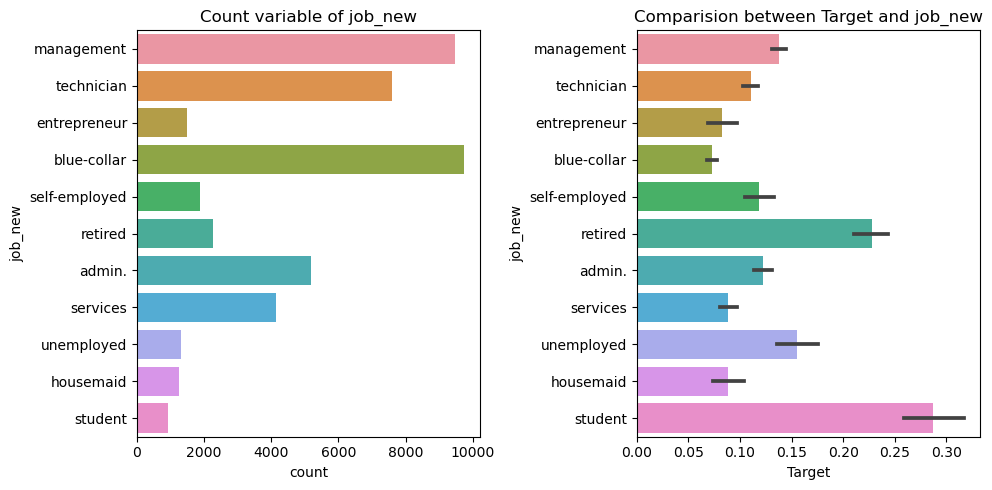

In [71]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='job_new', invert_axis=True)

There are various variables in the job's new column, and management contacts mostly blue-collar workers and technicians.

However, only students and retirees agreed to purchase policies from the agent.

### Bi Varient Visulaization For Categorical Data Variable marital

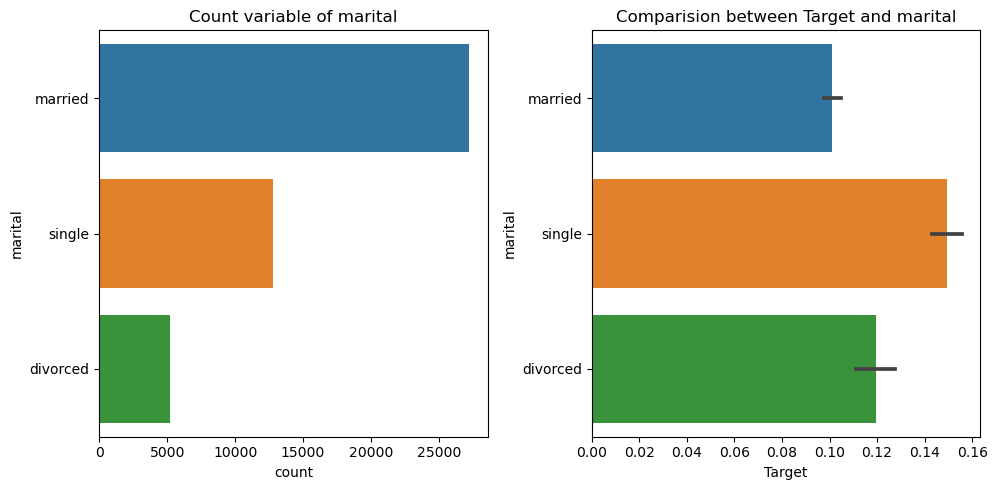

In [72]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='marital', invert_axis=True)

There are various variables in the marital's column, and bank management contacts mostly marrieds and singles.

However, only single agreed to purchase policies from the agent.

### Bi Varient Visulaization For Categorical Data Variable default

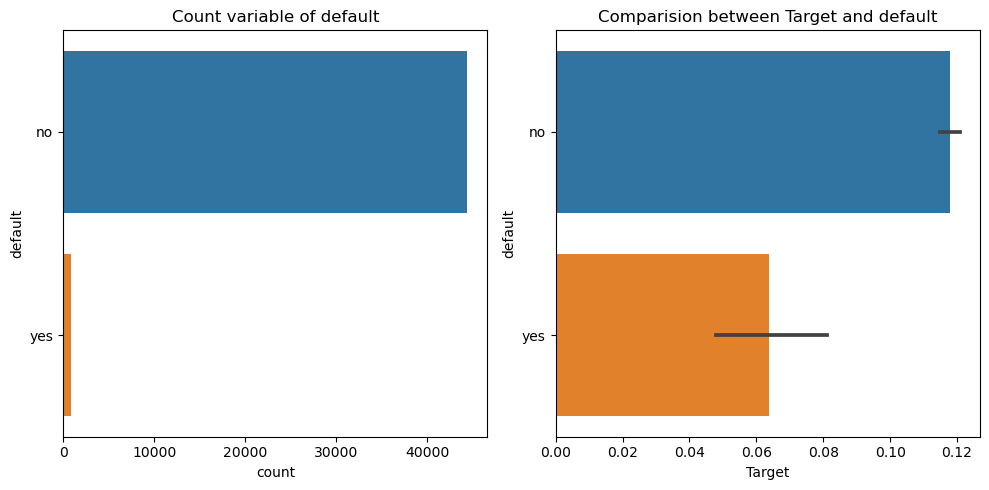

In [73]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='default', invert_axis=True)

Bank management connects with customers in a telephonic way and offers to purchase their term deposit policy in the bank.

Many customers do have not default credit those they are call.

### Bi Varient Visulaization For Categorical Data Variable housing

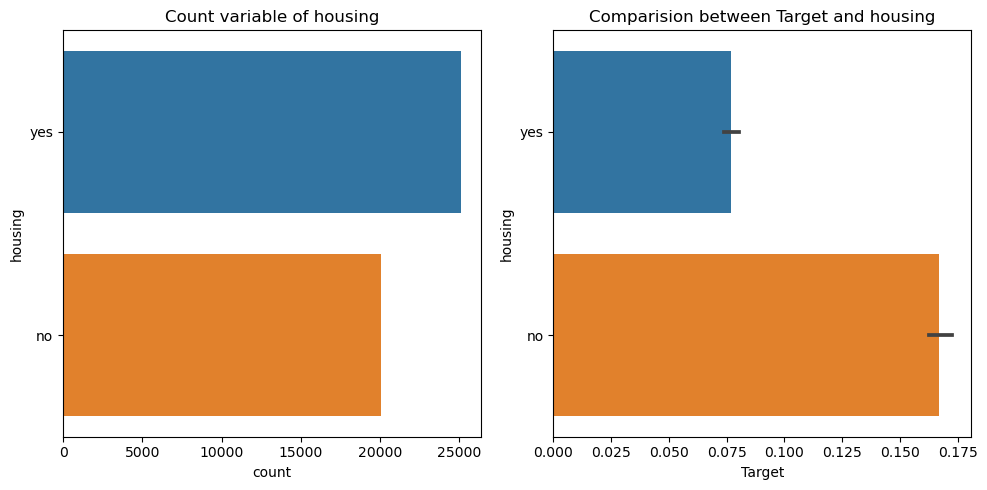

In [74]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='housing', invert_axis=True)

Many customers are contacted by the bank to purchase their policy they have their own house. 

But not all of them own a house that takes their policies.

### Bi Varient Visulaization For Categorical Data Variable loan

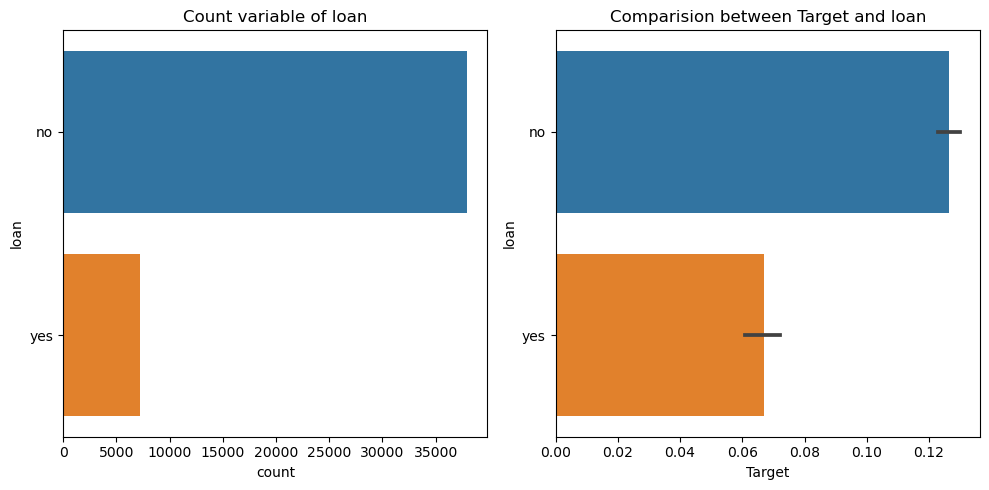

In [75]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='loan', invert_axis=True)

Many customers are contacted by the bank to purchase their policy most of them don't have a personal loan.

However, not all of them have a previous loan that takes their policies.

### Bi Varient Visulaization For Categorical Data Variable month

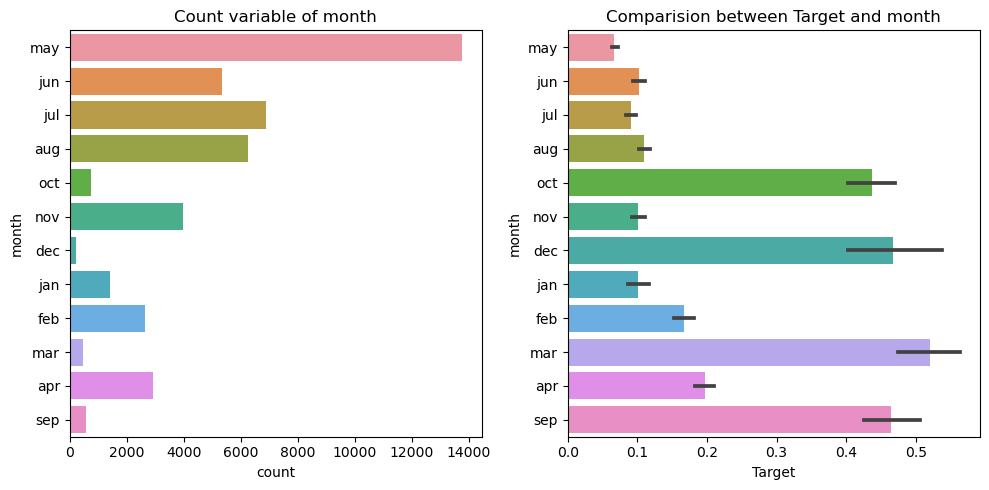

In [76]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='month', invert_axis=True)

Most of the calls from the bank call centers do in May and July in large numbers.

But customer takes their policy in large number in March, December, October, and September.

### Bi Varient Visulaization For Categorical Data Variable edu_new

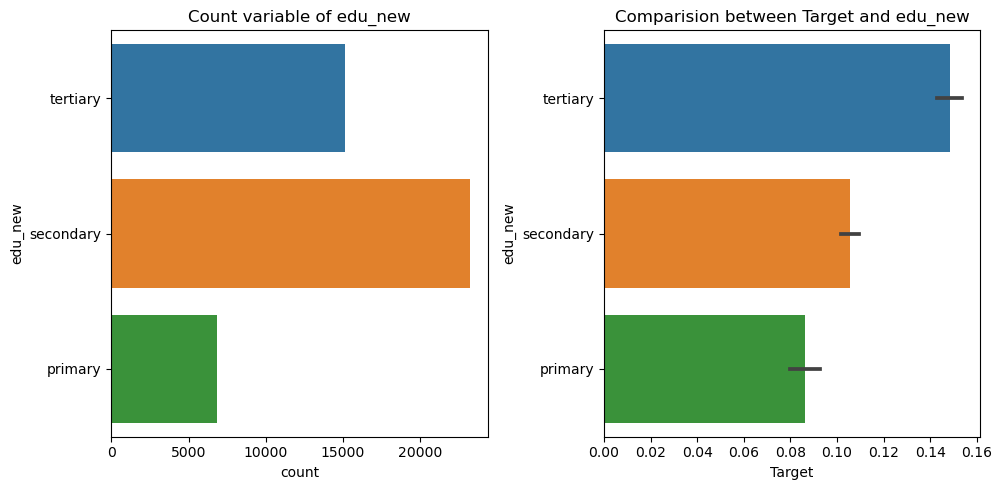

In [77]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='edu_new', invert_axis=True)

Bank management connects with customers in a telephonic way and offers to purchase their term deposit policy in the bank but

most of them are secondary-level educated customers.

Many customers who agreed to purchase their policy do have tertiary education.

### Bi Varient Visulaization For Categorical Data Variable contact_new

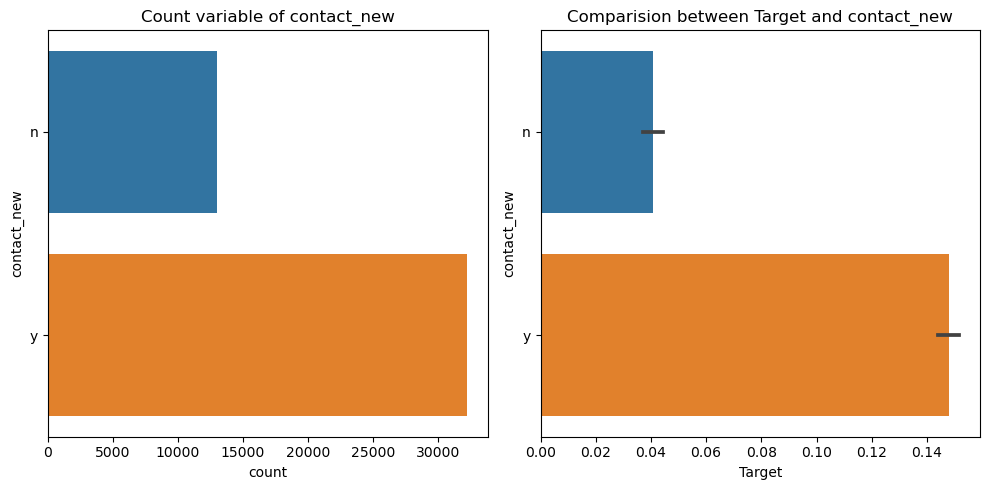

In [78]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='contact_new', invert_axis=True)

### Bi Varient Visulaization For Categorical Data Variable poutcome_new

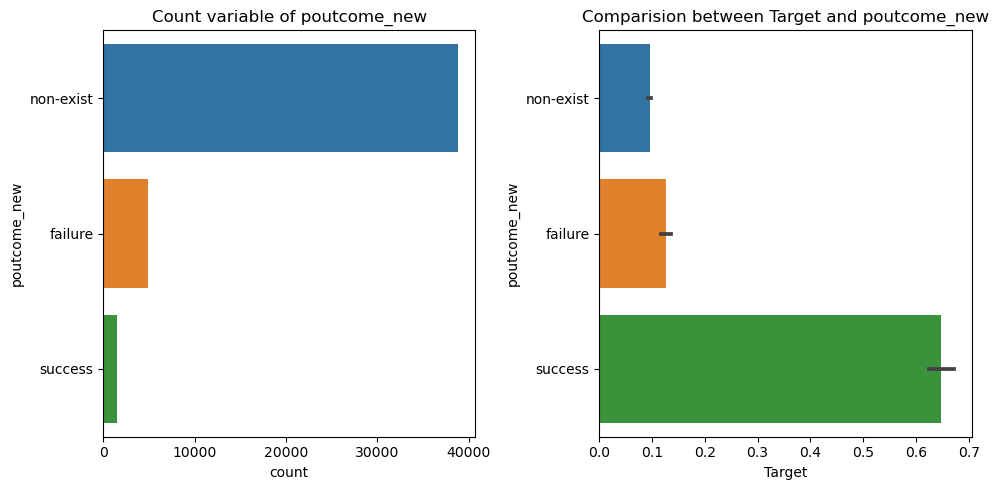

In [79]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
categorical_var(df,variable='poutcome_new', invert_axis=True)

Outcome from previous marketing campaign most of calls are successful

# Visulization of Numerical Type Dataset

In [80]:
# create a define function numerical type dataset data
def numerical_var(df,variable,target='Target', invert_axis=False):
    #'''we create a categorical function for comparasion other variable with target variable how much they understanding each 
    #other'''
    
    fig,ax = plt.subplots(ncols=2,figsize = (10,5))
    
    #plot count plot for variable
    if invert_axis == False:
        sns.countplot(x=variable,data=df,ax=ax[0])
    else:
        sns.countplot(y=variable, data=df, ax=ax[0])
    ax[0].set_title(f'Count variable of {variable}')
        
    #plot relation diagrm between variable and target columns
    
    if invert_axis==False:
        sns.boxplot(x= variable, y= target, data=df,hue='y', ax=ax[1])
    else:
        sns.boxplot(y= variable, x= target,data=df,hue='y',ax=ax[1])
    ax[1].set_title(f'Comparision between Target and {variable}')
    plt.tight_layout()
    plt.show()

### Bi Varient Visulaization For Categorical Data Variable age

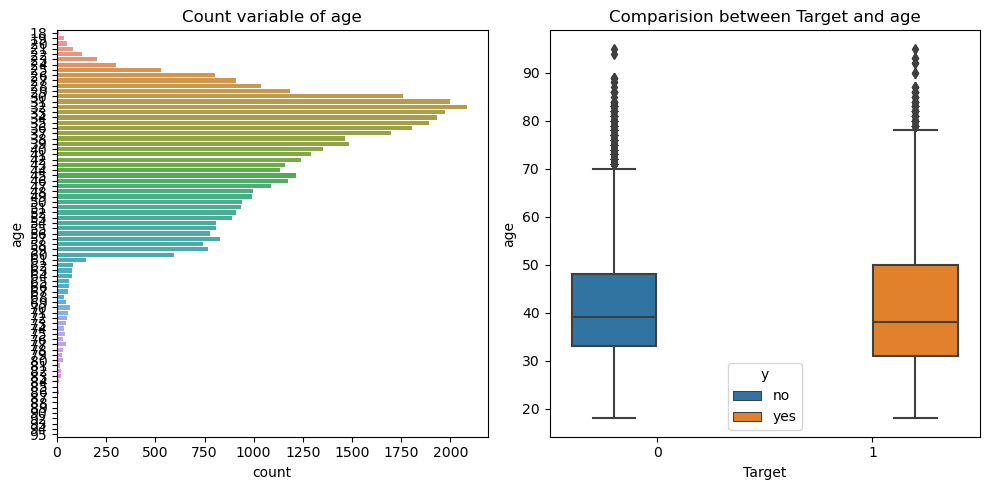

In [81]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
numerical_var(df,variable='age', invert_axis=True)

Most of customers their age is more and healthy they take term deposit policy in bank after call

### Bi Varient Visulaization For Categorical Data Variable balance

In [82]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
# numerical_var(df,variable='balance', invert_axis=True)

### Bi Varient Visulaization For Categorical Data Variable day

In [83]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
# numerical_var(df,variable='day', invert_axis=True)

day variable look like not useful for analysis model.

### Bi Varient Visulaization For Categorical Data Variable duration

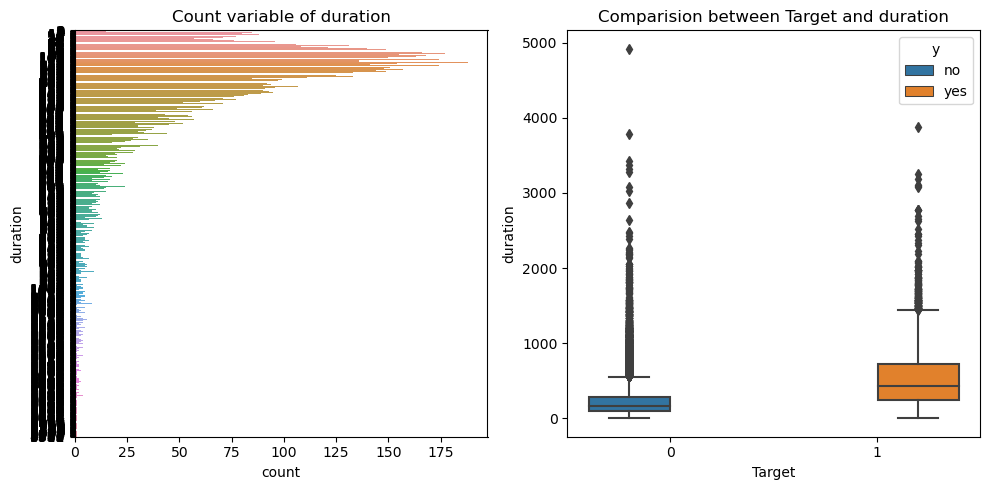

In [84]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
numerical_var(df,variable='duration', invert_axis=True)

In [85]:
df.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'y', 'job_new', 'edu_new',
       'contact_new', 'poutcome_new', 'pdays_new', 'previous_new', 'Target'],
      dtype='object')

IF conversion take long time it's means they have interset in take policy

### Bi Varient Visulaization For Categorical Data Variable campaign

In [86]:
# Create a box plot vs. count plot to visualize how data variables mostly connect with the target
# numerical_var(df,variable='campaign', invert_axis=True)

Number of cantact is not useful for sell policy

# Separate Dataset Into Numerical And Categorical variable columns

In [87]:
#categorical type dataset
df_cat = df.select_dtypes('object')
df_cat.head()

,marital,default,housing,loan,month,y,job_new,edu_new,contact_new,poutcome_new,pdays_new,previous_new
0,married,no,yes,no,may,no,management,tertiary,n,non-exist,No,No
1,single,no,yes,no,may,no,technician,secondary,n,non-exist,No,No
2,married,no,yes,yes,may,no,entrepreneur,secondary,n,non-exist,No,No
3,married,no,yes,no,may,no,blue-collar,tertiary,n,non-exist,No,No
4,single,no,no,no,may,no,self-employed,tertiary,n,non-exist,No,No


In [88]:
#numerical type dataset
df_num = df.select_dtypes('int64')
df_num.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [89]:
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,y,job_new,edu_new,contact_new,poutcome_new,pdays_new,previous_new,Target
0,58,married,no,2143,yes,no,5,may,261,1,no,management,tertiary,n,non-exist,No,No,0
1,44,single,no,29,yes,no,5,may,151,1,no,technician,secondary,n,non-exist,No,No,0
2,33,married,no,2,yes,yes,5,may,76,1,no,entrepreneur,secondary,n,non-exist,No,No,0
3,47,married,no,1506,yes,no,5,may,92,1,no,blue-collar,tertiary,n,non-exist,No,No,0
4,33,single,no,1,no,no,5,may,198,1,no,self-employed,tertiary,n,non-exist,No,No,0


In [90]:
# Convert all object type data into binary form 
le = LabelEncoder()
for i in df.columns:
    if df.dtypes[i] =='object':
        df[i] = le.fit_transform(df[i])

In [91]:
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,y,job_new,edu_new,contact_new,poutcome_new,pdays_new,previous_new,Target
0,58,1,0,2143,1,0,5,8,261,1,0,4,2,0,1,0,0,0
1,44,2,0,29,1,0,5,8,151,1,0,9,1,0,1,0,0,0
2,33,1,0,2,1,1,5,8,76,1,0,2,1,0,1,0,0,0
3,47,1,0,1506,1,0,5,8,92,1,0,1,2,0,1,0,0,0
4,33,2,0,1,0,0,5,8,198,1,0,6,2,0,1,0,0,0


# Correlation Between Dataset Variable With Target

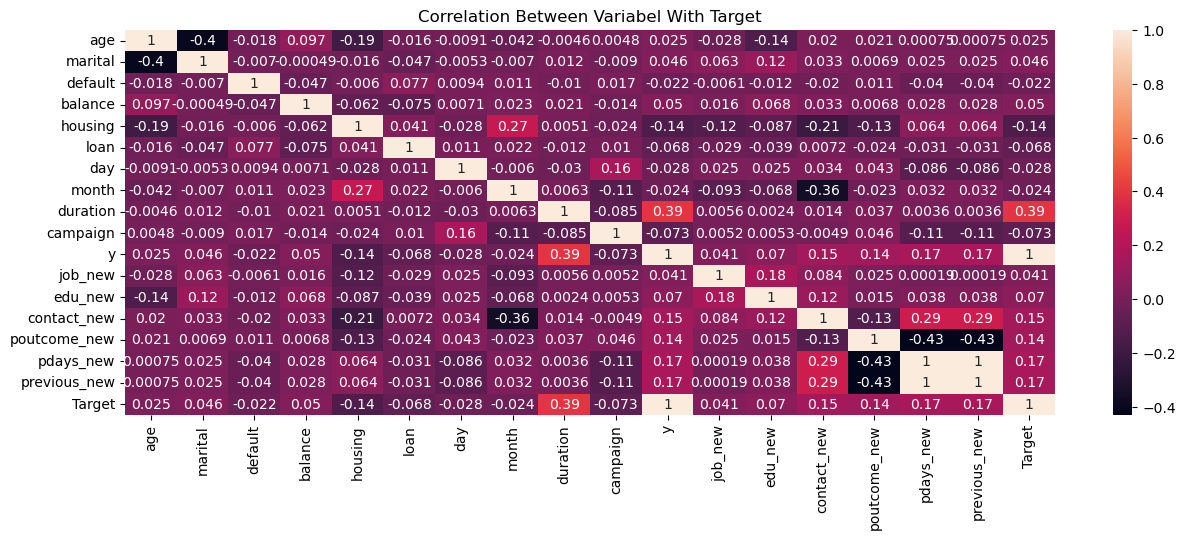

In [92]:
#correlation between varibale and target
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Between Variabel With Target')
plt.show()

### Correlation In Target And Variable : -->
1. Age variable correlated with target with 2.5%. It look like good bond with target.
2. Marital variable correlated with target with 4.6%. It look like good bond with target.
3. Default variable correlated with target with -2.2%. It look like good bond with target.
4. Balance variable correlated with target with 5%. It look like good bond with target.
5. Housing variable correlated with target with -14%. It look like very good bond with target.
6. Loan variable correlated with target with -6.8%. It look like good bond with target.
7. Day variable correlated with target with -2.8%. It look like good bond with target.
8. Month variable correlated with target with -2.4%. It look like good bond with target.
9. Duration variable correlated with target with 39%. It look like strong bond with target.
10. Campaign variable correlated with target with -7.3%. It look like good bond with target.
11. Pdays_new variable correlated with target with 17%. It look like very good bond with target.
12. Previous_new variable correlated with target with 17%. It look like very good bond with target.
13. Job_new variable correlated with target with 4.1%. It look like good bond with target.
14. Edu_new variable correlated with target with 7%. It look like good bond with target.
15. Contact_new variable correlated with target with 15%. It look like very good bond with target.
16. Pooutcome variable correlated with target with 14%. It look like very good bond with target.

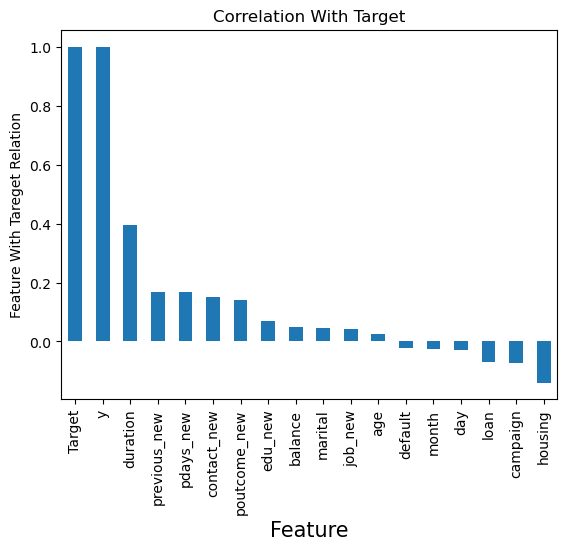

In [93]:
df.corr()['Target'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Feature With Tareget Relation')
plt.title('Correlation With Target')
plt.show()

Correlation with target is high for duration, and housing and less correlation with target is age and default.

# Check Skewness

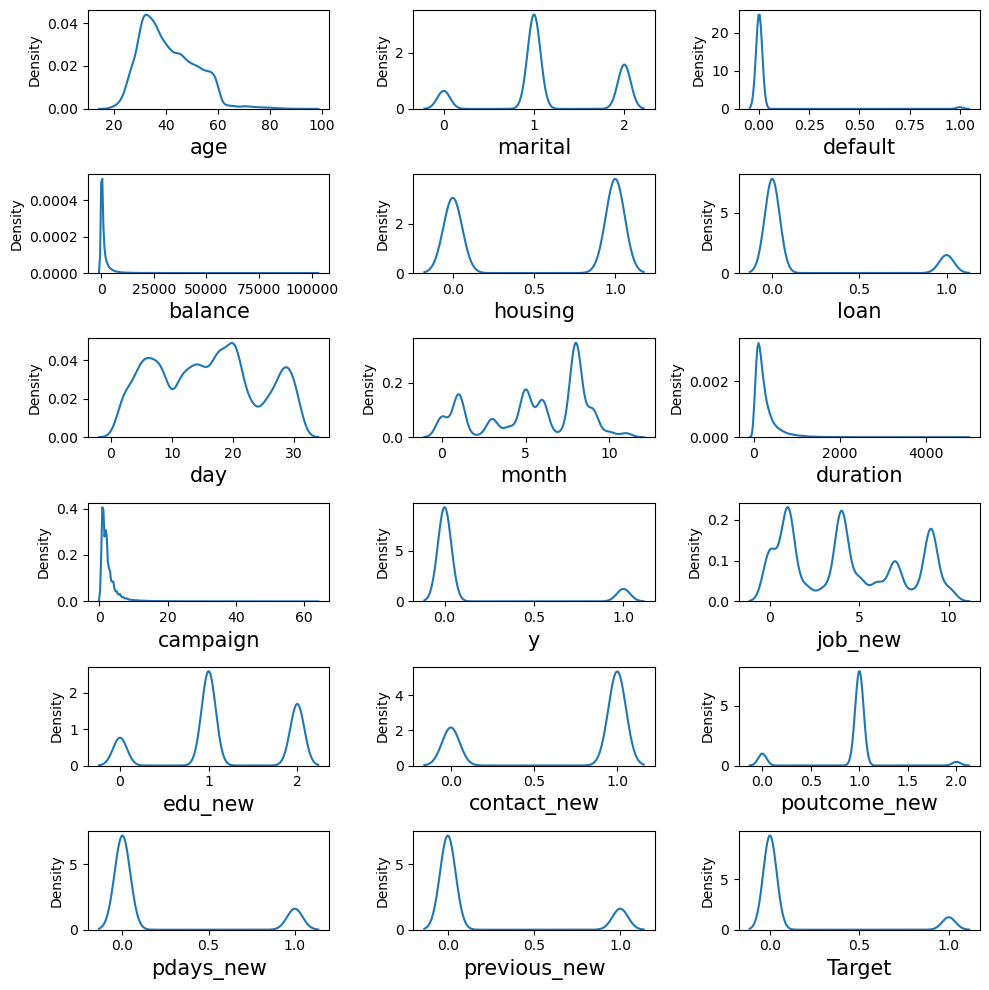

In [94]:
# skewness are present in dataset
col = df.columns
ncol = 3
nrow = 6
plt.figure(figsize=(10,10))
plt.title('Skewness in Dataset')
plotnumber=1
for i in col:
    if plotnumber <= 20:
        ax = plt.subplot(nrow, ncol, plotnumber)
        sns.kdeplot(x= df[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Skewness In Dataset Variable : -->

1. In Age variable skewness is present in left side means medain > mean.
2. In Marital variable no skewness is present means medain  =  mean.
3. In Default variable no skewness is present means medain = mean.
4. In Balance variable skewness is present in left side means medain > mean.
5. In Housing variable no skewness is present means medain = mean.
6. In Loan variable skewness is not present means medain = mean.
7. In Day variable skewness is present in extreme level.
8. In Month variable skewness is present in  extreme level.
9. In Duration variable skewness is present in left side means medain > mean.
10. In Campaign variable skewness is present in left side means medain > mean.
11. In Pdays_new variable skewness is not present means medain = mean.
12. In Previous_new variable skewness is not present means medain = mean.
13. In Job_new variable skewness is present in extreme level.
14. In edu_new variable no skewness is present means medain = mean.
15. In Contact_new variable no skewness is present means medain = mean.
16. In Poutcome_new variable no skewness is present means medain = mean.

# Check Ouliers

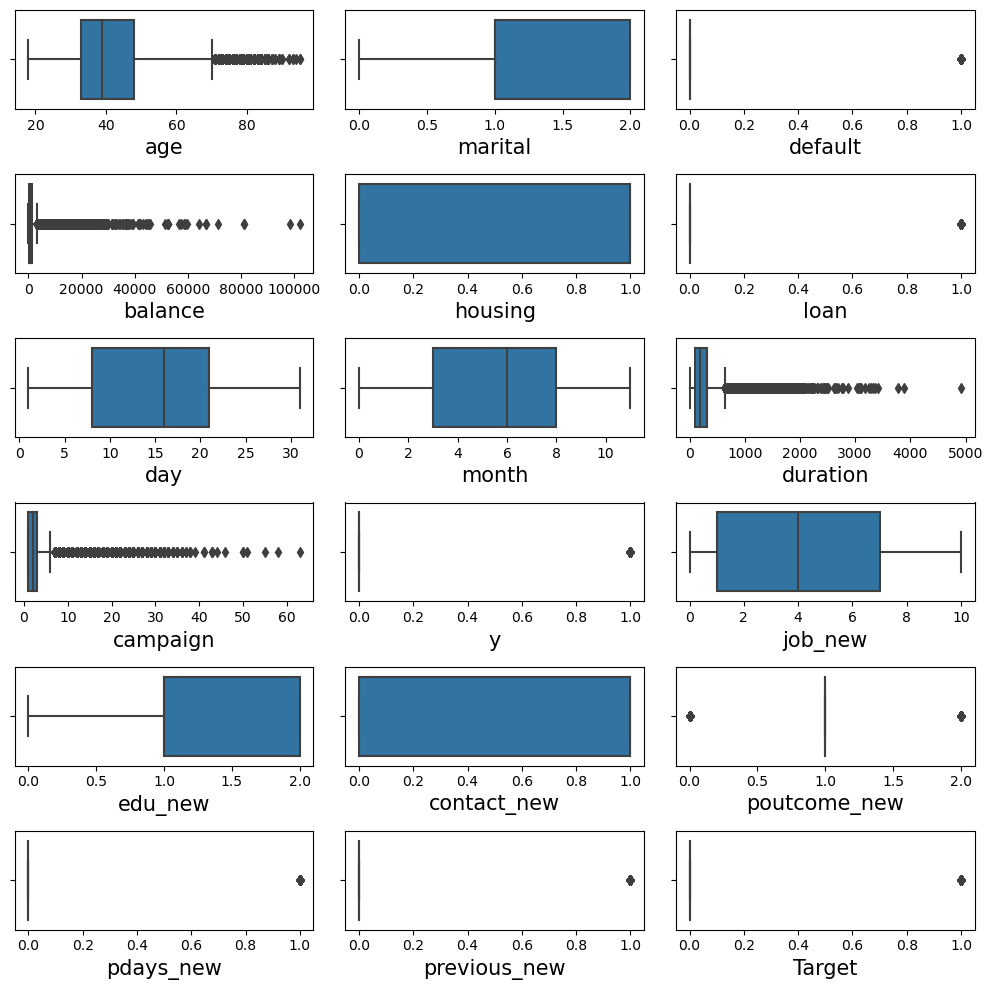

In [95]:
# Outliers are present in dataset
col = df.columns
ncol = 3
nrow = 6
plt.figure(figsize=(10,10))
plt.title('Skewness in Dataset')
plotnumber=1
for i in col:
    if plotnumber <= 20:
        ax = plt.subplot(nrow, ncol, plotnumber)
        sns.boxplot(x= df[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()

We consider only numerical type data's outliers --> Age, Balance,Duration, Campaign

There are two target values: the first comes with the dataset, and the second is created for numerical analysis.

In [96]:
# remove target variable column
df.drop(['Target'], axis=1, inplace=True)

# Check Outliers

In [97]:
# check_outliers in dataset
(zscore(df_num)<3).all().all()

False

Outliers are present in our numerical trype data

In [98]:
# check outliers in each column
(zscore(df_num)<3).all()

age         False
balance     False
day          True
duration    False
campaign    False
dtype: bool

Outliers are present in all numerical datasets, including if only the age variable is left.

if we use zscore to remove outliers from the dataset, we lose some data, and data are useful for us. 
So we use the IQR method to remove outliers without losing any data.

# IQR METHOD

In [99]:
#create a function to remove outliers
def removes_outliers(x):
    sorted(x)
    q1 = x.quantile(0.25) #for 25% range
    q3 = x.quantile(0.75) #for 75% range
    q2 = q3 - q1 #get median of dataset
    upper = q3 + (1.5*q2)
    lower = q1 - (1.5*q2)
    return lower,upper

In [100]:
for i in df_num.columns:
    if (zscore(df_num[i])<3).all() == False:
        lower, upper= removes_outliers(df_num[i])
        df_num[i] = np.where(df_num[i]>upper,upper,df_num[i])
        df_num[i] = np.where(df_num[i]<lower,lower,df_num[i])

### Check outliers after remove outliers from numreical data by box plot

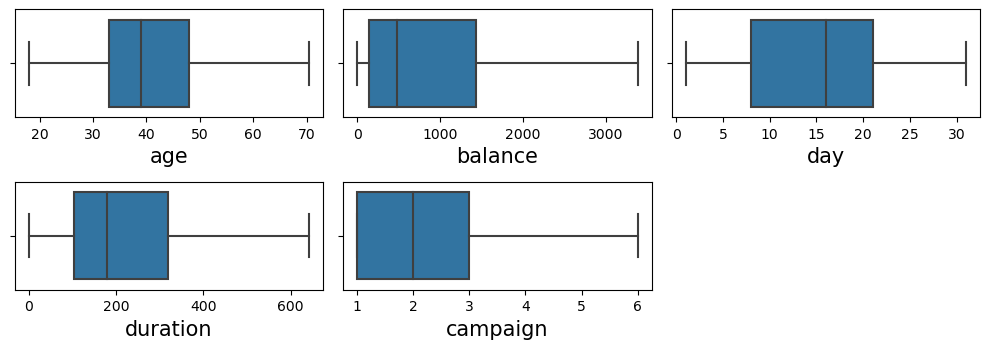

In [101]:
# Outliers are present in dataset
col = df_num.columns
ncol = 3
nrow = 6
plt.figure(figsize=(10,10))
plt.title('Skewness in Dataset')
plotnumber=1
for i in col:
    if plotnumber <= 20:
        ax = plt.subplot(nrow, ncol, plotnumber)
        sns.boxplot(x= df_num[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Skewness

### Check Skewness 

In [102]:
# Check skewness from numerical dataset
df_num.skew()

age         0.529715
balance     1.180854
day         0.093079
duration    1.037574
campaign    1.099115
dtype: float64

As we see that skewness are present in age, balance, duration, campaign

### Remove Skewness

In [103]:
df1_num = power_transform(df_num)

In [104]:
# check type
type(df1_num)

numpy.ndarray

In [105]:
# change into frame
df2_num=pd.DataFrame(df1_num,columns=df_num.columns)
df2_num.skew()

age         0.005618
balance    -0.184168
day        -0.157853
duration   -0.027948
campaign    0.176832
dtype: float64

Skewness is remove and comes under threshold value 0.5 

### Check skewness after remove skewness from numreical data by kde plot

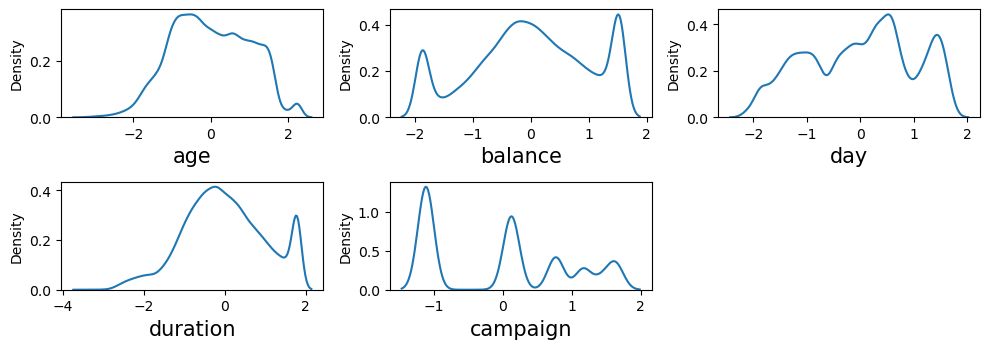

In [106]:
# skewness are present in dataset
col = df2_num.columns
ncol = 3
nrow = 6
plt.figure(figsize=(10,10))
plt.title('Skewness in Dataset')
plotnumber=1
for i in col:
    if plotnumber <= 20:
        ax = plt.subplot(nrow, ncol, plotnumber)
        sns.kdeplot(x= df2_num[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Categorical data Into Binary Form

In [107]:
for i in df_cat.columns:
    if df_cat.dtypes[i] =='object':
        df_cat[i] = le.fit_transform(df_cat[i])

# Hypothesis Testing

### Statistical Testing of categorical features with target variable

Ho: There is no significant difference in hidden score for different category of target variable(Deposit on call)

H1: There is significant difference in hidden score for different category of target variable(Deposit on call)

In [108]:
for i in df_cat:
    crosstab=pd.crosstab(df_cat['y'],df_cat[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Target)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Target)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in marital Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in default Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in housing Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in loan Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in month Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in y Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in job_new Feature for different category of target variable(Target)


 Rejecting Null Hypothesis. 
 There is significant difference in edu_new Feature

### Statistical Testing of categorical features with target variable
We can statistically check whether all the independent variables has significant effect on target variables

In [109]:
for i in df2_num:
    x = np.array(df2_num[df_cat.y == 0][i]) 
    y = np.array(df2_num[df_cat.y == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.5184492726310377
 Fail to Reject Null Hypothesis.age of Loan holders and non-Loan holders are  same


 P_Value:9.42392133120185e-81
 Rejecting Null Hypothesis.balance of Loan holders and non-Loan holders are not same


 P_Value:3.1829595720831343e-10
 Rejecting Null Hypothesis.day of Loan holders and non-Loan holders are not same


 P_Value:0.0
 Rejecting Null Hypothesis.duration of Loan holders and non-Loan holders are not same


 P_Value:1.882973987719734e-77
 Rejecting Null Hypothesis.campaign of Loan holders and non-Loan holders are not same




In [110]:
# Age variable fail to reject null hypothesis so we drop it
df2_num.drop(['age'],axis=1,inplace=True)

# Merge Both Dataset

In [111]:
df = pd.concat([df_cat, df2_num],axis=1)
df

,marital,default,housing,loan,month,y,job_new,edu_new,contact_new,poutcome_new,pdays_new,previous_new,balance,day,duration,campaign
0,1,0,1,0,8,0,4,2,0,1,0,0,1.097281,-1.351873,0.412248,-1.113596
1,2,0,1,0,8,0,9,1,0,1,0,0,-1.205134,-1.351873,-0.264939,-1.113596
2,1,0,1,1,8,0,2,1,0,1,0,0,-1.719506,-1.351873,-0.978769,-1.113596
3,1,0,1,0,8,0,1,2,0,1,0,0,0.797672,-1.351873,-0.793941,-1.113596
4,2,0,0,0,8,0,6,2,0,1,0,0,-1.782521,-1.351873,0.057359,-1.113596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,0,0,9,1,9,2,1,1,0,0,0.345440,0.220403,1.781741,0.767793
45207,0,0,0,0,9,1,5,0,1,1,0,0,0.911720,0.220403,1.218666,0.124615
45208,1,0,0,0,9,1,5,1,1,2,1,1,1.528246,0.220403,1.781741,1.435054
45209,1,0,0,0,9,0,1,1,1,1,0,0,0.202753,0.220403,1.389816,1.164611


# Multicolonity

In [112]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variable'] = x.columns
    vif['Feature']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [113]:
calc_vif(df)

,variable,Feature
0,marital,4.334986
1,default,1.033508
2,housing,2.405343
3,loan,1.205870
4,month,4.379692
5,y,1.446982
6,job_new,2.791374
7,edu_new,4.104895
8,contact_new,3.725286
9,poutcome_new,6.251777


In [114]:
# pdays_new and previous_new both are same so we remove it
df.drop(['pdays_new'],axis=1,inplace=True)

In [115]:
calc_vif(df)

,variable,Feature
0,marital,4.334986
1,default,1.033508
2,housing,2.405343
3,loan,1.205870
4,month,4.379692
5,y,1.446982
6,job_new,2.791374
7,edu_new,4.104895
8,contact_new,3.725286
9,poutcome_new,6.251777


# Target Variable

In [116]:
# Check Target varible values
print(df.y.value_counts())

0    39922
1     5289
Name: y, dtype: int64


<AxesSubplot: xlabel='y', ylabel='count'>

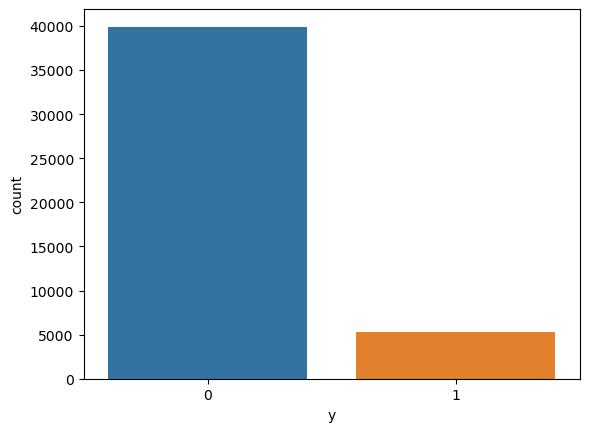

In [117]:
# visulaization of target variable
sns.countplot(x=df.y)

In this dataset target variable imbalances are present so we remove them with help of the smote method

# Save Dataset

In [118]:
df.to_csv('bank_data.csv')

# Load Dataset

In [6]:
# import our save data
df=pd.read_csv('bank_data.csv')
df

,Unnamed: 0,marital,default,housing,loan,month,y,job_new,edu_new,contact_new,poutcome_new,previous_new,balance,day,duration,campaign
0,0,1,0,1,0,8,0,4,2,0,1,0,1.097281,-1.351873,0.412248,-1.113596
1,1,2,0,1,0,8,0,9,1,0,1,0,-1.205134,-1.351873,-0.264939,-1.113596
2,2,1,0,1,1,8,0,2,1,0,1,0,-1.719506,-1.351873,-0.978769,-1.113596
3,3,1,0,1,0,8,0,1,2,0,1,0,0.797672,-1.351873,-0.793941,-1.113596
4,4,2,0,0,0,8,0,6,2,0,1,0,-1.782521,-1.351873,0.057359,-1.113596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,1,0,0,0,9,1,9,2,1,1,0,0.345440,0.220403,1.781741,0.767793
45207,45207,0,0,0,0,9,1,5,0,1,1,0,0.911720,0.220403,1.218666,0.124615
45208,45208,1,0,0,0,9,1,5,1,1,2,1,1.528246,0.220403,1.781741,1.435054
45209,45209,1,0,0,0,9,0,1,1,1,1,0,0.202753,0.220403,1.389816,1.164611


In [7]:
# Remove unwanted column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# split in independent and dependent variable

In [8]:
x=df.drop(['y'],axis=1)   #independent variable
y= df['y']   # dependent variable

# SMOTE Method

In [9]:
# apply smote method for balancibg target
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [10]:
y.value_counts()

0    39922
1    39922
Name: y, dtype: int64

# Apply standard scaler on independent variable

In [11]:
# apply min max scaler
# st=MinMaxScaler()
st = StandardScaler()
x=st.fit_transform(x)
x

array([[-0.2450836 , -0.10236645,  1.14442101, ..., -1.3219658 ,
        -0.01261276, -1.03854765],
       [ 1.37361563, -0.10236645,  1.14442101, ..., -1.3219658 ,
        -0.67420845, -1.03854765],
       [-0.2450836 , -0.10236645,  1.14442101, ..., -1.3219658 ,
        -1.37160351, -1.03854765],
       ...,
       [-1.86378283, -0.10236645,  1.14442101, ..., -0.34011568,
         1.32534894,  1.08769666],
       [ 1.37361563, -0.10236645, -0.8738043 , ..., -0.29674522,
         0.49696109,  1.74735978],
       [-0.2450836 , -0.10236645, -0.8738043 , ...,  1.28657057,
         0.56423254,  1.79036827]])

# Modeling 

In [16]:
# Creating instances for different Classifiers
LO= LogisticRegression()
GA= GaussianNB()
# MU= MultinomialNB()
# BA= BernoulliNB()
KN= KNeighborsClassifier()
SV= SVC()
DT= DecisionTreeClassifier()
AD= AdaBoostClassifier()
GR= GradientBoostingClassifier()
RF= RandomForestClassifier()
XG= xgb.XGBClassifier(objective="reg:linear", random_state=42)

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LO))
# models.append(('MultinomialNB',MU))
# models.append(('GaussianNB',GA))
# models.append(('Bernoulli',BA))
models.append(('DecisionTreeClassifier',DT))
models.append(('KneighborsClassifier',KN))
models.append(('AdaBoostClassifier',AD))
models.append(('GradientBoostingClassifier',GR))
models.append(('RandomForestClassifier',RF))
models.append(('XGBClassifier',XG))

****************************** LogisticRegression ******************************
The maximum accuracy score of LogisticRegression is 0.8277287244035318 is achieved at 12




Accuracy_Score:  82.39088233452314


Accuracy Score of Model  : 82.19804305283758


AUC_Score: 82.4068002903342


At cv=8,mean_score is 0.8065088297022861.The test accuracy_score is 0.8239088233452314 and train accuracy is 0.8219804305283758.


Cross Validation Score:  80.65088297022861


Precision Score: 80.57511036869109


Recall_Score:  85.08252488345722


Balanced Accuracy_Score:  82.40680029033417


F1 Score:  82.7674960166687


Confusion matrix: 

[[6404 1628]
 [1184 6753]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8032
           1       0.81      0.85      0.83      7937

    accuracy                           0.82     15969
   macro avg       0.82      0.82      0.82     15969
weighted avg       0.82      0.82      0.8

<Figure size 500x500 with 0 Axes>

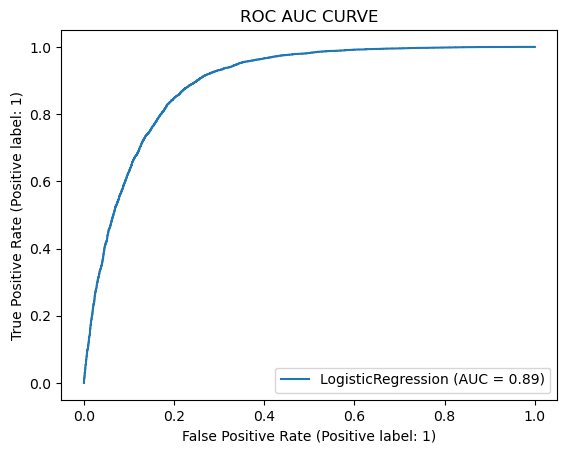





****************************** DecisionTreeClassifier ******************************
The maximum accuracy score of DecisionTreeClassifier is 0.8937942263134824 is achieved at 26




Accuracy_Score:  88.47141336339158


Accuracy Score of Model  : 99.99843444227005


AUC_Score: 88.47685436281833


At cv=8,mean_score is 0.7540448671112389.The test accuracy_score is 0.8847141336339157 and train accuracy is 0.9999843444227006.


Cross Validation Score:  75.51344335299193


Precision Score: 87.65752409191994


Recall_Score:  89.39145772962075


Balanced Accuracy_Score:  88.47685436281834


F1 Score:  88.51600024951655


Confusion matrix: 

[[7033  999]
 [ 842 7095]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      8032
           1       0.88      0.89      0.89      7937

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88     

<Figure size 500x500 with 0 Axes>

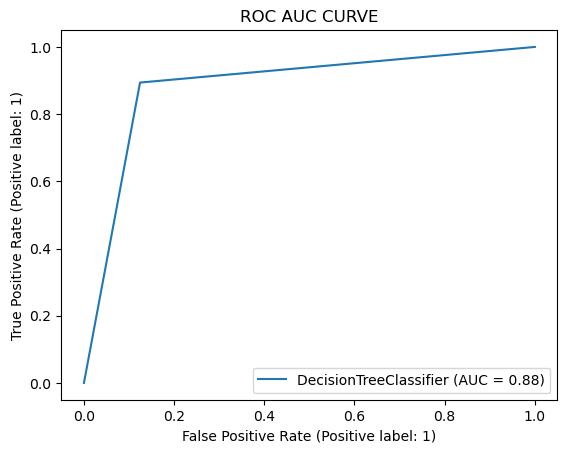





****************************** KneighborsClassifier ******************************
The maximum accuracy score of KneighborsClassifier is 0.8973010207276598 is achieved at 28




Accuracy_Score:  89.53597595340973


Accuracy Score of Model  : 92.14559686888454


AUC_Score: 89.57476052072421


At cv=8,mean_score is 0.8246190281575072.The test accuracy_score is 0.8953597595340973 and train accuracy is 0.9214559686888454.


Cross Validation Score:  82.46190281575072


Precision Score: 84.85758789497108


Recall_Score:  96.09424215698627


Balanced Accuracy_Score:  89.57476052072421


F1 Score:  90.12703101920236


Confusion matrix: 

[[6671 1361]
 [ 310 7627]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8032
           1       0.85      0.96      0.90      7937

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.89     15969
weighted avg       0.90      0.9

<Figure size 500x500 with 0 Axes>

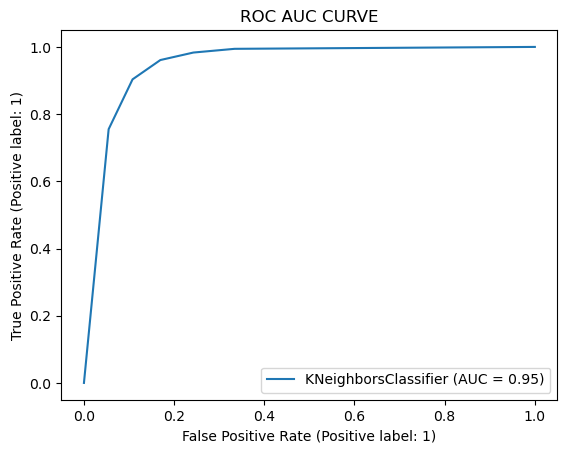





****************************** AdaBoostClassifier ******************************
The maximum accuracy score of AdaBoostClassifier is 0.8653641430271151 is achieved at 13




Accuracy_Score:  85.95403594464275


Accuracy Score of Model  : 85.8082191780822


AUC_Score: 85.96139961384148


At cv=8,mean_score is 0.8089760236332799.The test accuracy_score is 0.8595403594464275 and train accuracy is 0.8580821917808219.


Cross Validation Score:  80.89760236332799


Precision Score: 84.94108983799705


Recall_Score:  87.1991936499937


Balanced Accuracy_Score:  85.96139961384146


F1 Score:  86.05533105377681


Confusion matrix: 

[[6805 1227]
 [1016 6921]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8032
           1       0.85      0.87      0.86      7937

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86     

<Figure size 500x500 with 0 Axes>

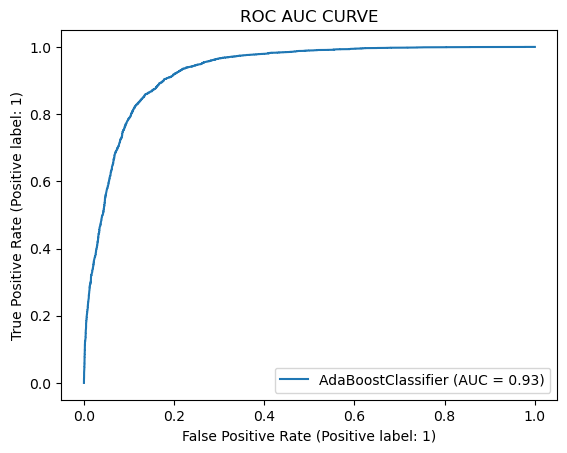





****************************** GradientBoostingClassifier ******************************
The maximum accuracy score of GradientBoostingClassifier is 0.8864675308410045 is achieved at 12




Accuracy_Score:  88.40879203456697


Accuracy Score of Model  : 88.2348336594912


AUC_Score: 88.43062297866616


At cv=8,mean_score is 0.8210113444000515.The test accuracy_score is 0.8840879203456697 and train accuracy is 0.882348336594912.


Cross Validation Score:  82.10113444000515


Precision Score: 85.65737051792829


Recall_Score:  92.10028978203351


Balanced Accuracy_Score:  88.43062297866616


F1 Score:  88.76206666261915


Confusion matrix: 

[[6808 1224]
 [ 627 7310]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      8032
           1       0.86      0.92      0.89      7937

    accuracy                           0.88     15969
   macro avg       0.89      0.88      0.88     15969
weighted avg       0.8

<Figure size 500x500 with 0 Axes>

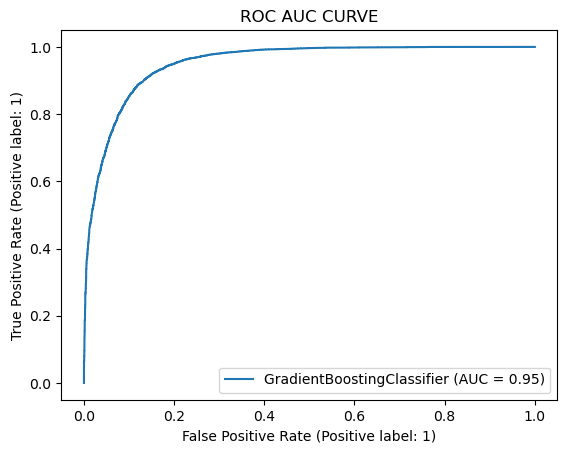





****************************** RandomForestClassifier ******************************
The maximum accuracy score of RandomForestClassifier is 0.9326820715135575 is achieved at 27




Accuracy_Score:  93.00519757029244


Accuracy Score of Model  : 99.99843444227005


AUC_Score: 93.02644609291197


At cv=8,mean_score is 0.8409756204624458.The test accuracy_score is 0.9300519757029244 and train accuracy is 0.9999843444227006.


Cross Validation Score:  84.08253374296936


Precision Score: 90.05167958656331


Recall_Score:  96.59821091092353


Balanced Accuracy_Score:  93.02644609291195


F1 Score:  93.21013920126435


Confusion matrix: 

[[7185  847]
 [ 270 7667]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      8032
           1       0.90      0.97      0.93      7937

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93     

<Figure size 500x500 with 0 Axes>

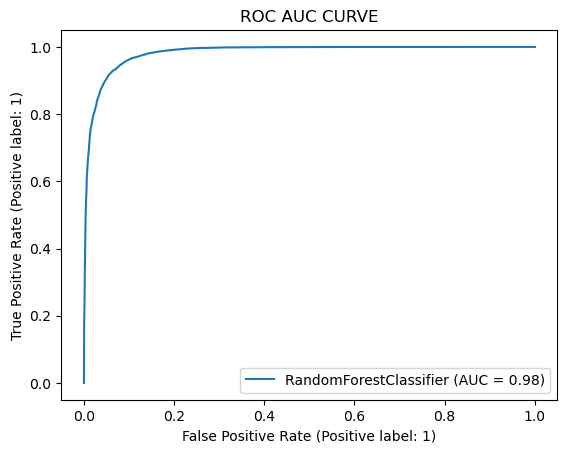





****************************** XGBClassifier ******************************
[07:50:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederr

[07:51:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

[07:53:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
At cv=8,mean_score is 0.8015117337671034.The test accuracy_score is 0.936188

<Figure size 500x500 with 0 Axes>

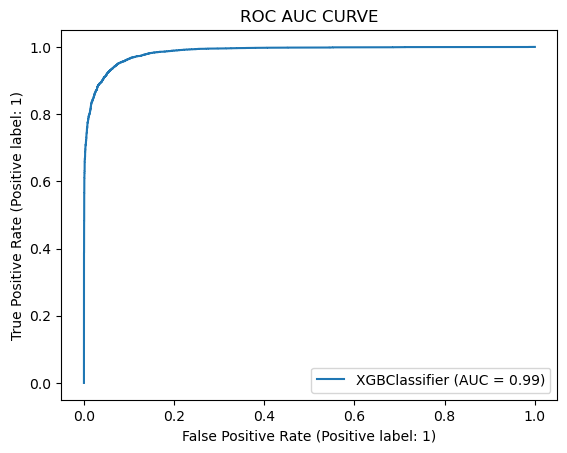

In [17]:
# Creating empty lists
Model = []
Acc_score = []
Model_score=[]
cvs = []
Precision_Score=[]
Roc_score=[]
Recall_score=[]
F1_Score=[]
Balanced_score=[]

for name,model in models:
    print("******************************",name,"******************************")
    # Determining Best Random State
    
    max_score=0
    for r_state in range (10,40):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        # apply smote method for balancibg target
        #sm=SMOTE()
        #x_train,y_train=sm.fit_resample(x_train,y_train)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score of", name ,"is", max_score, "is achieved at", final_r_state)
    print("\n")
    
    #Model.append(name)
    Model.append(name)
    model.fit(x_train,y_train)
    print('\n')
    
    #print(model)
    y_pred=model.predict(x_test)
    
    # Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
    print('\n')
    
    #trainning score
    pred_train=model.predict(x_train)
    Score=accuracy_score(y_train,pred_train)*100
    print(f"Accuracy Score of Model  : {(accuracy_score(y_train,pred_train)*100)}")
    Model_score.append(Score)
    print('\n')
    
    #roc_score
    auc_score=roc_auc_score(y_test,y_pred)*100
    print('AUC_Score:',auc_score)
    Roc_score.append(auc_score)
    print('\n')
    
     # Determining Best cv random State
    max_cv =0
    test=model.predict(x_test)
    train=model.predict(x_train)
    for i in range(2,10):
        cv_score=cross_val_score(model,x,y,cv=i)
        mean_score=cv_score.mean()
        if mean_score > max_cv:
            max_cv = mean_score
            final_cv=i
    print(f"At cv={final_cv},mean_score is {max_cv}.The test accuracy_score is {accuracy_score(y_test,test)} and train accuracy is {accuracy_score(y_train,train)}.")
    print('\n')    
    
    # Cross Validation Score
    cv=cross_val_score(model,x,y,cv=final_cv,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
    print('\n')
    
    #Pricision Score
    print('Precision Score:', precision_score(y_test,y_pred)*100)
    pre_score=precision_score(y_test,y_pred)*100
    Precision_Score.append(pre_score)
    print('\n')
    
    # Recall Score
    recal_score=recall_score(y_test,y_pred)*100
    print('Recall_Score: ',recal_score)
    Recall_score.append(recal_score)
    print('\n')

    #Balanced Accuracy Score
    bal_score=balanced_accuracy_score(y_test,y_pred)*100
    print('Balanced Accuracy_Score: ',bal_score)
    Balanced_score.append(bal_score)
    print('\n')
    
    # f1 Score
    f1_scor=f1_score(y_test,y_pred)*100
    print('F1 Score: ',f1_scor)
    F1_Score.append(f1_scor)
    print('\n')
    
    # Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    
    # Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    
    #roc_curve
    plt.figure(figsize=(5,5))
    plot_roc_curve(model,x_test,y_test)
    plt.title('ROC AUC CURVE')
    plt.show()
    print('\n')
    print('\n')

In [28]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy_Score': Acc_score,'Dataset_score':Model_score,'Cross_Validation_Score':cvs,
                      'Precision':Precision_Score,'Recall_Score':Recall_score,'F1_Score':F1_Score,'Balanced_Score':Balanced_score,
                      'Roc_Score':Roc_score,}) 
Results

,Model,Accuracy_Score,Dataset_score,Cross_Validation_Score,Precision,Recall_Score,F1_Score,Balanced_Score,Roc_Score
0,LogisticRegression,82.390882,82.198043,80.650883,80.575110,85.082525,82.767496,82.406800,82.406800
1,DecisionTreeClassifier,88.471413,99.998434,75.513443,87.657524,89.391458,88.516000,88.476854,88.476854
2,KneighborsClassifier,89.535976,92.145597,82.461903,84.857588,96.094242,90.127031,89.574761,89.574761
3,AdaBoostClassifier,85.954036,85.808219,80.897602,84.941090,87.199194,86.055331,85.961400,85.961400
4,GradientBoostingClassifier,88.408792,88.234834,82.101134,85.657371,92.100290,88.762067,88.430623,88.430623
5,RandomForestClassifier,93.005198,99.998434,84.082534,90.051680,96.598211,93.210139,93.026446,93.026446
6,XGBClassifier,93.618887,95.282975,80.151173,92.049599,95.401285,93.695477,93.629427,93.629427


### We consider certain points when selecting a model using train-test split and cross-validation scores in the model selection process --> 

1. The minimum difference between the accuracy score for training data and the accuracy score for testing data can help
resolve overfitting and underfitting problems.

2. The minimum difference between the accuracy score and the Cross-val score can help resolve overfitting and underfitting
problems.

### Process for select model -->

1. The first condition fullfill by two model gradient boosting and ada boost method which gives less diffrences between train score 
and test score, so overfitting and underfitting is less.

2. The seconed condition also fullfill by gradient boosting and ada boost method which gives less diffrences between accuracy
score and cross-val score.

3. From in these both two models, gradient boosting classifiers gives highest precision, Recall and Roc_score, so i choose this 
model as best model 

# Hypertuning For Gradient Boosting Classifier

In [31]:
dict1={'criterion':['friedman_mse','squared_error'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400],
      'loss':['log_loss', 'exponential']}

In [32]:
Gs=GridSearchCV(GR,dict1,cv=8)
Gs.fit(x,y)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400]})

In [33]:
Gs.best_score_

0.8272988128847616

In [34]:
Gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_features': 'sqrt',
 'n_estimators': 200}

### Analysis By HyperTuning Feature

      Iter       Train Loss   Remaining Time 
         1           0.9708           13.33s
         2           0.9476           14.94s
         3           0.9298           12.99s
         4           0.9216           12.64s
         5           0.8934           13.01s
         6           0.8816           13.31s
         7           0.8720           13.19s
         8           0.8642           12.65s
         9           0.8564           12.51s
        10           0.8502           12.40s
        20           0.7341           12.82s
        30           0.6848           12.10s
        40           0.6436           11.24s
        50           0.6205           10.63s
        60           0.6011            9.92s
        70           0.5849            9.25s
        80           0.5734            8.55s
        90           0.5640            7.84s
       100           0.5544            7.14s
       200           0.4992            0.00s
Confusion Matrix : [[6858 1174]
 [ 643 7294]]
Classifi

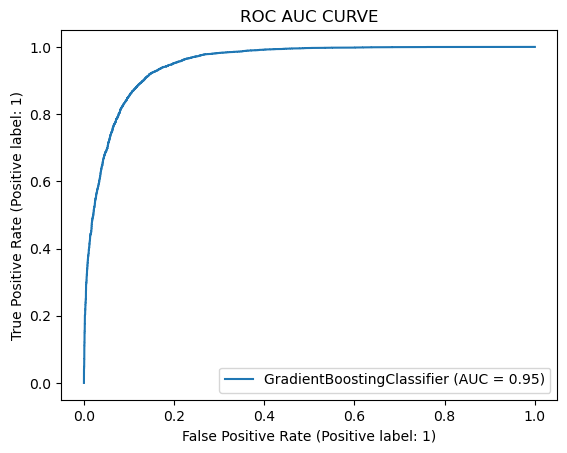

In [37]:
Gbc=GradientBoostingClassifier(criterion='friedman_mse',max_features='sqrt',n_estimators=200,loss= 'exponential', verbose=1)
Gbc.fit(x_train,y_train)
pred_test=Gbc.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")  #accuracy score of testing data
print(f"Dataset Score : {(Gbc.score(x_train,y_train))*100}")    #model working with dataset
print('Precision Score:', precision_score(y_test,pred_test)*100)   #precision score for how accurate our prediction
print(f"Recall_score:{recall_score(y_test,pred_test)*100}")   #recall score
print(f"F1_score:{f1_score(y_test,pred_test)*100}")  #f1_score
plot_roc_curve(Gbc,x_test,y_test)   # roc currve
plt.title('ROC AUC CURVE')
plt.show()

All parameter are increases littlebit so i save this model as best model.

# Save Best Model

In [38]:
import joblib

In [39]:
joblib.dump(Gbc,'bankdata.pkl')

['bankdata.pkl']